# 5. Bivariate Data Summary

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch05_visual_summary.jpg" alt="Chapter 05 Visual Summary" width="100%">

This notebook provides an interactive introduction to bivariate data analysis and simple linear regression using Python. You'll learn how to summarize relationships between two variables using correlation, scatter plots, and regression analysis. All code runs directly in Google Colab without any local setup.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch05_Bivariate_Data_Summary.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=sVT1KfjoZQg" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s05-bivariate-data-summary-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_05" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/697865de2f5d08069e0482cc" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/69789e4c2f5d08069e0704c6" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>

## Chapter Overview

**Bivariate data** involves observations on two variables—for example, house prices and house sizes, or income and education. This chapter teaches you how to summarize and analyze relationships between two variables using correlation and regression.

**What you'll learn:**

- Summarize bivariate relationships using two-way tabulations and scatterplots
- Calculate and interpret correlation coefficients and understand their relationship to covariance
- Estimate and interpret regression lines using ordinary least squares (OLS)
- Evaluate model fit using R-squared, standard error, and variation decomposition
- Make predictions and identify outliers in regression analysis
- Understand the critical distinction between association and causation
- Apply nonparametric regression methods to check linearity assumptions

**Datasets used:**

- **AED_HOUSE.DTA**: House prices and characteristics for 29 houses sold in Central Davis, California in 1999 (price, size, bedrooms, bathrooms, lot size, age)

**Chapter outline:**

- 5.1 Example - House Price and Size
- 5.2 Two-Way Tabulation
- 5.3 Two-Way Scatter Plot
- 5.4 Sample Correlation
- 5.5 Regression Line
- 5.6 Measures of Model Fit
- 5.7 Computer Output Following Regression
- 5.8 Prediction and Outlying Observations
- 5.9 Regression and Correlation
- 5.10 Causation
- 5.11 Nonparametric Regression

## Setup

First, we import the necessary Python packages and configure the environment for reproducibility. All data will stream directly from GitHub.

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.ndimage import gaussian_filter1d
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("Setup complete! Ready to explore bivariate data analysis.")

Setup complete! Ready to explore bivariate data analysis.


## 5.1 Example - House Price and Size

We begin by loading and examining data on house prices and sizes from 29 houses sold in Central Davis, California in 1999. This dataset will serve as our main example throughout the chapter.

**Why this dataset?**

- Small enough to see individual observations
- Large enough to demonstrate statistical relationships
- Economically meaningful: housing is a major component of wealth
- Clear relationship: larger houses tend to cost more

In [2]:
# Load the house data
data_house = pd.read_stata(GITHUB_DATA_URL + 'AED_HOUSE.DTA')

print("Data loaded successfully!")
print(f"Number of observations: {len(data_house)}")
print(f"Number of variables: {data_house.shape[1]}")
print(f"\nVariables: {', '.join(data_house.columns.tolist())}")

Data loaded successfully!
Number of observations: 29
Number of variables: 8

Variables: price, size, bedrooms, bathrooms, lotsize, age, monthsold, list


In [3]:
# Display the complete dataset (Table 5.1)
print("=" * 70)
print("TABLE 5.1: Complete Dataset")
print("=" * 70)
print(data_house.to_string())

TABLE 5.1: Complete Dataset
     price  size  bedrooms  bathrooms  lotsize   age  monthsold    list
0   204000  1400         3        2.0        1  31.0          7  199900
1   212000  1600         3        3.0        2  33.0          5  212000
2   213000  1800         3        2.0        2  51.0          4  219900
3   220000  1600         3        2.0        1  49.0          4  229000
4   224500  2100         4        2.5        2  47.0          6  224500
5   229000  1700         4        2.5        2  35.0          3  229500
6   230000  2100         4        2.0        2  34.0          8  239000
7   233000  1700         3        2.0        1  40.0          6  244500
8   235000  1700         4        2.0        2  29.0          7  245000
9   235000  1600         3        2.0        3  35.0          5  242000
10  236500  1600         3        2.0        3  23.0          8  239500
11  238000  1900         4        2.0        2  29.0          7  249000
12  239500  1600         3        2.

In [4]:
# Summary statistics (Table 5.2)
print("=" * 70)
print("TABLE 5.2: Summary Statistics")
print("=" * 70)
print(data_house[['price', 'size']].describe())

# Extract key variables
price = data_house['price']
size = data_house['size']

print("\nPrice Statistics:")
print(f"  Mean:      ${price.mean():,.2f}")
print(f"  Median:    ${price.median():,.2f}")
print(f"  Min:       ${price.min():,.2f}")
print(f"  Max:       ${price.max():,.2f}")
print(f"  Std Dev:   ${price.std():,.2f}")

print("\nSize Statistics:")
print(f"  Mean:      {size.mean():,.0f} sq ft")
print(f"  Median:    {size.median():,.0f} sq ft")
print(f"  Min:       {size.min():,.0f} sq ft")
print(f"  Max:       {size.max():,.0f} sq ft")
print(f"  Std Dev:   {size.std():,.0f} sq ft")

TABLE 5.2: Summary Statistics
               price         size
count      29.000000    29.000000
mean   253910.344828  1882.758621
std     37390.710695   398.272130
min    204000.000000  1400.000000
25%    233000.000000  1600.000000
50%    244000.000000  1800.000000
75%    270000.000000  2000.000000
max    375000.000000  3300.000000

Price Statistics:
  Mean:      $253,910.34
  Median:    $244,000.00
  Min:       $204,000.00
  Max:       $375,000.00
  Std Dev:   $37,390.71

Size Statistics:
  Mean:      1,883 sq ft
  Median:    1,800 sq ft
  Min:       1,400 sq ft
  Max:       3,300 sq ft
  Std Dev:   398 sq ft


> **Key Concept 5.1: Summary Statistics for Bivariate Data**
>
> Summary statistics describe the center, spread, and range of each variable before examining their relationship. For bivariate analysis, compute the mean, median, standard deviation, minimum, and maximum of both variables. Comparing means and medians reveals skewness; standard deviations indicate variability. These univariate summaries provide essential context for interpreting correlation and regression results.

**What do these numbers tell us about the Davis housing market (1999)?**

**Price Statistics:**

- **Mean = \$253,910**: Average house price in the sample
- **Median = \$244,000**: Middle value (half above, half below)
- **Range**: \$204,000 to \$375,000 (spread of \$171,000)
- **Std Dev = \$37,391**: Typical deviation from the mean

**Size Statistics:**

- **Mean = 1,883 sq ft**: Average house size
- **Median = 1,800 sq ft**: Middle value
- **Range**: 1,400 to 3,300 sq ft (spread of 1,900 sq ft)
- **Std Dev = 398 sq ft**: Typical deviation from the mean

**Key insights:**

- Both distributions are fairly symmetric (means close to medians)
- Substantial variation in both price and size (good for regression!)
- The price coefficient of variation (CV = 0.15) and size CV (0.21) show moderate variability
- **Moving from univariate to bivariate**: In Chapter 2, we looked at single variables. Now we ask: *how do these two variables move together?*

**Economic context:** These are moderate-sized homes in a California college town (UC Davis), with typical prices for the late 1990s.

**Key observations:**

- House prices range from \$204,000 to \$375,000 (mean: \$253,910)
- House sizes range from 1,400 to 3,300 square feet (mean: 1,883 sq ft)
- Both variables show substantial variation, which is good for regression analysis
- The data appear to be reasonably symmetric (means close to medians)

## 5.2 Two-Way Tabulation

A **two-way tabulation** (or crosstabulation) shows how observations are distributed across combinations of two categorical variables. For continuous variables like price and size, we first create categorical ranges.

**Why use tabulation?**

- Provides a quick summary of the relationship
- Useful for discrete or categorical data
- Can reveal patterns before formal analysis

In [5]:
# Create categorical variables
price_range = pd.cut(price, bins=[0, 249999, np.inf],
                     labels=['< $250,000', '≥ $250,000'])

size_range = pd.cut(size, bins=[0, 1799, 2399, np.inf],
                    labels=['< 1,800', '1,800-2,399', '≥ 2,400'])

# Create two-way table 
print("=" * 70)
print("Two-Way Tabulation of Price and Size")
print("=" * 70)
crosstab = pd.crosstab(price_range, size_range, margins=True)
print(crosstab)

print("\nInterpretation:")
print("- 11 houses are both low-priced and small")
print("- 0 houses are both low-priced and large (≥ 2,400 sq ft)")
print("- 3 houses are both high-priced and large")
print("- Pattern suggests positive association: larger houses tend to be more expensive")

Two-Way Tabulation of Price and Size
size        < 1,800  1,800-2,399  ≥ 2,400  All
price                                         
< $250,000       11            6        0   17
≥ $250,000        2            7        3   12
All              13           13        3   29

Interpretation:
- 11 houses are both low-priced and small
- 0 houses are both low-priced and large (≥ 2,400 sq ft)
- 3 houses are both high-priced and large
- Pattern suggests positive association: larger houses tend to be more expensive


> **Key Concept 5.2: Two-Way Tabulations**
>
> Two-way tabulations show the joint distribution of two categorical variables. Expected frequencies (calculated assuming independence) provide the basis for Pearson's chi-squared test of statistical independence. The crosstabulation reveals patterns: no low-priced large houses suggests a positive association between size and price.

**What does this crosstab tell us?**

Looking at the table:

- **11 houses** are both small (< 1,800 sq ft) AND low-priced (< \$250,000)
- **0 houses** are both large (≥ 2,400 sq ft) AND low-priced
- **3 houses** are both large (≥ 2,400 sq ft) AND high-priced (≥ \$250,000)
- **6 houses** are medium-sized (1,800-2,399 sq ft) AND low-priced

**The pattern reveals:**

- **Positive association**: Most observations cluster in the "small and cheap" or "large and expensive" cells
- **No counterexamples**: We never see "large and cheap" houses (the bottom-right cell is empty)
- **Imperfect relationship**: Some medium-sized houses are low-priced (6 houses), some are high-priced (7 houses)

**Limitation of tabulation:**

- We lose information by categorizing continuous variables
- We can't quantify the strength of the relationship
- We can't make precise predictions

**Next step:** Use the correlation coefficient and regression to measure the relationship more precisely using the full continuous data.

**From Categorical to Continuous:**

Crosstabulation is useful but has limitations:

- **Information loss**: We convert continuous data (exact prices/sizes) into categories
- **Arbitrary bins**: Results can change depending on where we draw category boundaries
- **No precise measurement**: Can't quantify exact strength of relationship

**Solution**: Use the full continuous data with **correlation** and **regression** to:

- Preserve all information in the original measurements
- Get precise, interpretable measures (r, slope)
- Make specific predictions for any value of x

## 5.3 Two-Way Scatter Plot

A **scatter plot** is the primary visual tool for examining the relationship between two continuous variables. Each point represents one observation, with x-coordinate showing size and y-coordinate showing price.

**What to look for:**

- **Direction:** Does y increase or decrease as x increases?
- **Strength:** How closely do points follow a pattern?
- **Form:** Is the relationship linear or curved?
- **Outliers:** Are there unusual observations far from the pattern?

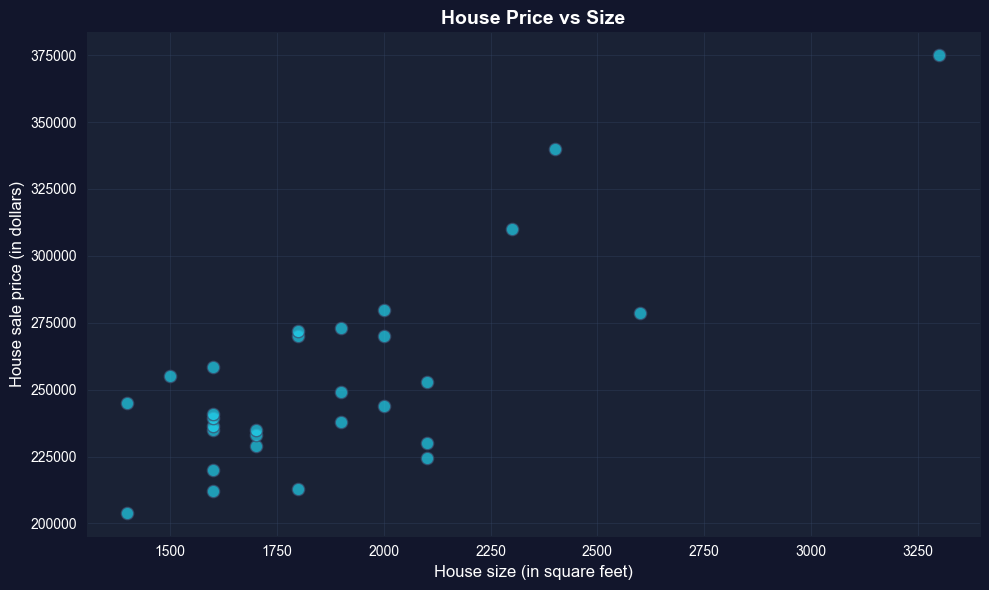


What the scatter plot shows:
✓ Positive relationship: Larger houses tend to have higher prices
✓ Roughly linear: Points follow an upward-sloping pattern
✓ Moderate scatter: Not all points lie exactly on a line
✓ No obvious outliers: All points fit the general pattern


In [6]:
# Scatter plot of price vs size
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(size, price, s=80, alpha=0.7, color='#22d3ee', edgecolor='#3a4a6b')
ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('House Price vs Size', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nWhat the scatter plot shows:")
print("✓ Positive relationship: Larger houses tend to have higher prices")
print("✓ Roughly linear: Points follow an upward-sloping pattern")
print("✓ Moderate scatter: Not all points lie exactly on a line")
print("✓ No obvious outliers: All points fit the general pattern")

> **Key Concept 5.3: Scatterplots and Relationships**
>
> Scatterplots provide visual evidence of relationships between two continuous variables. They reveal the direction (positive/negative), strength (tight/loose clustering), form (linear/curved), and outliers of the relationship. The house price-size scatterplot shows a strong, positive, roughly linear relationship with no obvious outliers.

**Visual vs. Quantitative Analysis:**

The scatter plot provides **qualitative** insight (direction, form, outliers), but we need **quantitative** measures to:

- **Communicate precisely**: "Strong positive relationship" is vague; "r = 0.79" is specific
- **Compare across studies**: Can't compare scatter plots directly across datasets
- **Test hypotheses**: Need numerical values for statistical inference (Chapter 7)
- **Make predictions**: Visual estimates from graphs are imprecise

**Next**: We'll quantify this relationship using the correlation coefficient.

**What patterns do we observe?**

**1. Direction: Positive relationship**

- As house size increases (moving right), house price increases (moving up)
- This makes economic sense: bigger houses should cost more

**2. Form: Roughly linear**

- Points follow an upward-sloping pattern
- No obvious curvature (e.g., not exponential or U-shaped)
- A straight line appears to be a reasonable summary

**3. Strength: Moderate to strong**

- Points cluster fairly closely around an imaginary line
- Not perfect (some scatter), but clear pattern visible
- We'll quantify this with the correlation coefficient

**4. Outliers: None obvious**

- No houses wildly far from the general pattern
- All observations seem consistent with the relationship

**Comparison to univariate analysis (Chapter 2):**

- **Univariate**: Histogram shows distribution of one variable
- **Bivariate**: Scatter plot shows *relationship* between two variables
- **New question**: How does Y change when X changes?

**What we can't tell from the graph alone:**

- Exact strength of relationship (need correlation)
- Precise prediction equation (need regression)
- Statistical significance (need inference, Chapter 7)

## 5.4 Sample Correlation

The **correlation coefficient** $r$ is a unit-free measure of linear association between two variables. It ranges from -1 to 1:

- $r = 1$: Perfect positive linear relationship
- \$0 < r < 1$: Positive linear relationship
- $r = 0$: No linear relationship
- $-1 < r < 0$: Negative linear relationship
- $r = -1$: Perfect negative linear relationship

**Formula:**
$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \times \sum_{i=1}^{n}(y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

where $s_{xy}$ is the sample covariance, and $s_x$, $s_y$ are sample standard deviations.

**Key Properties of Correlation:**

Understanding these properties helps avoid common misinterpretations:

1. **Unit-free**: r = 0.79 whether we measure price in dollars, thousands, or millions
2. **Bounded**: Always between -1 and +1 (unlike covariance, which is unbounded)
3. **Symmetric**: r(price, size) = r(size, price) — order doesn't matter
4. **Only measures linear relationships**: Can miss curved, U-shaped, or other nonlinear patterns
5. **Sensitive to outliers**: One extreme point can dramatically change r

**Limitation**: Correlation is a summary measure but doesn't provide predictions. For that, we need **regression**.

In [7]:
# Compute correlation and covariance
cov_matrix = data_house[['price', 'size']].cov()
corr_matrix = data_house[['price', 'size']].corr()

print("=" * 70)
print("COVARIANCE AND CORRELATION")
print("=" * 70)

print("\nCovariance matrix:")
print(cov_matrix)

print("\nCorrelation matrix:")
print(corr_matrix)

r = corr_matrix.loc['price', 'size']
print(f"\nCorrelation coefficient: r = {r:.4f}")
print(f"\nInterpretation:")
print(f"  The correlation of {r:.4f} indicates a strong positive linear")
print(f"  relationship between house price and size.")
print(f"  About {r**2:.1%} of the variation in price is linearly associated")
print(f"  with variation in size.")

COVARIANCE AND CORRELATION

Covariance matrix:
              price          size
price  1.398065e+09  1.170161e+07
size   1.170161e+07  1.586207e+05

Correlation matrix:
          price      size
price  1.000000  0.785782
size   0.785782  1.000000

Correlation coefficient: r = 0.7858

Interpretation:
  The correlation of 0.7858 indicates a strong positive linear
  relationship between house price and size.
  About 61.7% of the variation in price is linearly associated
  with variation in size.


> **Key Concept 5.4: The Correlation Coefficient**
>
> The correlation coefficient (r) is a scale-free measure of linear association ranging from -1 (perfect negative) to +1 (perfect positive). A correlation of 0 indicates no linear relationship. For house price and size, r = 0.786 indicates strong positive correlation. The correlation is unit-free, symmetric, and measures only linear relationships.

**What does r = 0.7858 mean?**

**1. Strength of linear association:**

- **r = 0.7858** indicates a **strong positive** linear relationship
- Scale reference:
  - |r| < 0.3: weak
  - 0.3 ≤ |r| < 0.7: moderate
  - |r| ≥ 0.7: strong
- Our value (0.79) is well into the "strong" range

**2. Direction:**

- **Positive**: Larger houses are associated with higher prices
- If r were negative, larger houses would be associated with lower prices (unlikely for housing!)

**3. Variance explained (preview):**

- r² = (0.7858)² = 0.617 = **61.7%**
- About 62% of price variation is linearly associated with size variation
- The remaining 38% is due to other factors (location, age, condition, etc.)

**4. Properties of correlation:**

- **Unit-free**: Same value whether we measure price in dollars or thousands of dollars
- **Symmetric**: r(price, size) = r(size, price) = 0.7858
- **Bounded**: Always between -1 and +1
- **Linear measure**: Detects linear relationships, not curves

**Comparison to Chapter 2 (univariate):**

- Chapter 2: Standard deviation measures spread of ONE variable
- Chapter 5: Correlation measures how TWO variables move together
- Both are standardized measures (unit-free)

**Economic interpretation:** The strong correlation confirms what we saw in the scatter plot: house size is a major determinant of house price, but it's not the only factor.

### Illustration: Different Correlation Patterns

To build intuition, let's visualize simulated data with different correlation coefficients.

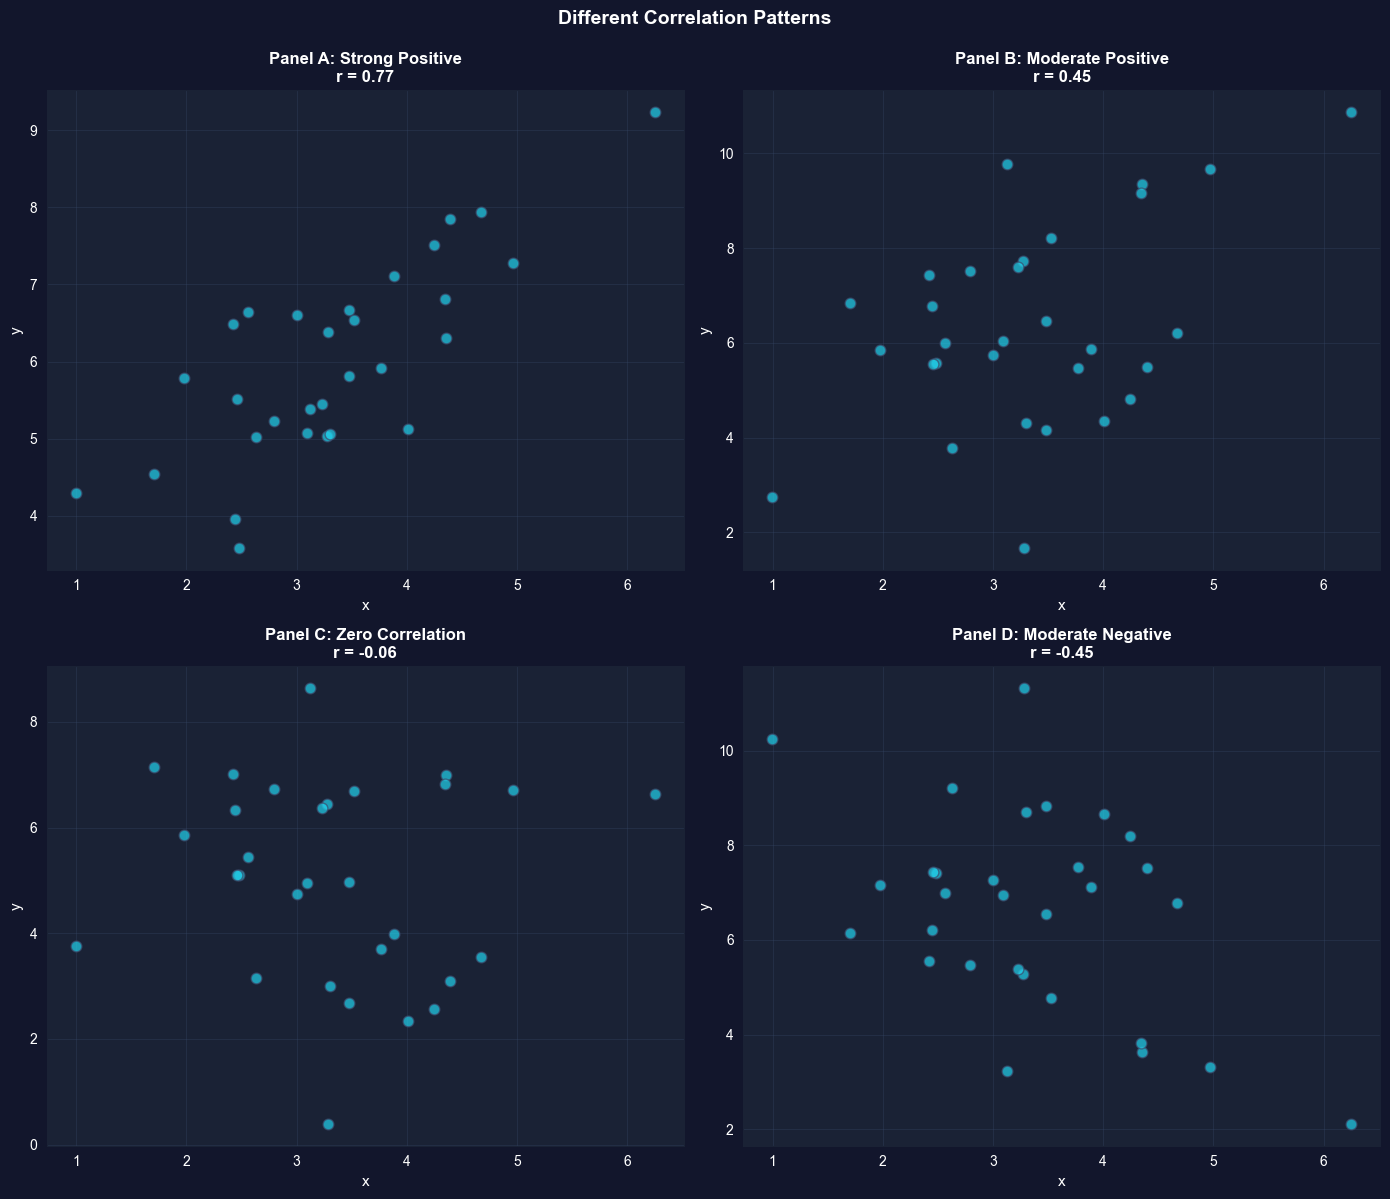


Key observations:
• Panel A (r ≈ 0.78): Points cluster tightly around an upward slope
• Panel B (r ≈ 0.44): More scatter, but still positive relationship
• Panel C (r ≈ 0.00): No systematic pattern
• Panel D (r ≈ -0.53): Points follow a downward slope


In [8]:
# Different correlation patterns
np.random.seed(12345)
n = 30
x = np.random.normal(3, 1, n)
u1 = np.random.normal(0, 0.8, n)
y1 = 3 + x + u1  # Strong positive correlation
u2 = np.random.normal(0, 2, n)
y2 = 3 + x + u2  # Moderate positive correlation
y3 = 5 + u2      # Zero correlation
y4 = 10 - x - u2 # Moderate negative correlation

correlations = [
    np.corrcoef(x, y1)[0, 1],
    np.corrcoef(x, y2)[0, 1],
    np.corrcoef(x, y3)[0, 1],
    np.corrcoef(x, y4)[0, 1]
]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

datasets = [(x, y1, 'Panel A: Strong Positive'),
            (x, y2, 'Panel B: Moderate Positive'),
            (x, y3, 'Panel C: Zero Correlation'),
            (x, y4, 'Panel D: Moderate Negative')]

for idx, (ax, (x_data, y_data, title), corr) in enumerate(zip(axes, datasets, correlations)):
    ax.scatter(x_data, y_data, s=60, alpha=0.7, color='#22d3ee', edgecolor='#3a4a6b')
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'{title}\nr = {corr:.2f}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Different Correlation Patterns',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nKey observations:")
print("• Panel A (r ≈ 0.78): Points cluster tightly around an upward slope")
print("• Panel B (r ≈ 0.44): More scatter, but still positive relationship")
print("• Panel C (r ≈ 0.00): No systematic pattern")
print("• Panel D (r ≈ -0.53): Points follow a downward slope")

## 5.5 Regression Line

The **regression line** provides the "best-fitting" linear summary of the relationship between y (dependent variable) and x (independent variable):

$$\hat{y} = b_1 + b_2 x$$

where:

- $\hat{y}$ = predicted (fitted) value of y
- $b_1$ = intercept (predicted y when x = 0)
- $b_2$ = slope (change in y for one-unit increase in x)

**Ordinary Least Squares (OLS)** chooses $b_1$ and $b_2$ to minimize the sum of squared residuals:

$$\min_{b_1, b_2} \sum_{i=1}^n (y_i - b_1 - b_2 x_i)^2$$

**Formulas:**
$$b_2 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{s_{xy}}{s_x^2}$$

$$b_1 = \bar{y} - b_2 \bar{x}$$

**Transition Note:** Correlation measures the strength of association, but doesn't provide a prediction equation. Now we turn to regression analysis, which fits a line to predict y from x and quantifies how much y changes per unit change in x.

In [9]:
# Fit OLS regression
model = ols('price ~ size', data=data_house).fit()

print("=" * 70)
print("REGRESSION RESULTS: price ~ size")
print("=" * 70)
print(model.summary())

REGRESSION RESULTS: price ~ size
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           4.41e-07
Time:                        22:12:31   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.15e+

> **Key Concept 5.5: Ordinary Least Squares**
>
> The method of ordinary least squares (OLS) chooses the regression line to minimize the sum of squared residuals. This yields formulas for the slope (b₂ = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²) and intercept (b₁ = ȳ - b₂x̄) that can be computed from the data. The slope equals the covariance divided by the variance of x.

In [10]:
# Extract and interpret coefficients
intercept = model.params['Intercept']
slope = model.params['size']
r_squared = model.rsquared

print("=" * 70)
print("KEY REGRESSION COEFFICIENTS")
print("=" * 70)
print(f"\nFitted regression line:")
print(f"  ŷ = {intercept:,.2f} + {slope:.2f} × size")
print(f"\nIntercept (b₁): ${intercept:,.2f}")
print(f"  Interpretation: Predicted price when size = 0")
print(f"  (Not economically meaningful in this case)")

print(f"\nSlope (b₂): ${slope:.2f} per square foot")
print(f"  Interpretation: Each additional square foot is associated with")
print(f"  a ${slope:.2f} increase in house price, on average.")

print(f"\nExamples:")
print(f"  • 100 sq ft larger → ${slope * 100:,.2f} higher price")
print(f"  • 500 sq ft larger → ${slope * 500:,.2f} higher price")

print(f"\nR-squared: {r_squared:.4f} ({r_squared*100:.2f}%)")
print(f"  {r_squared*100:.2f}% of price variation is explained by size")

KEY REGRESSION COEFFICIENTS

Fitted regression line:
  ŷ = 115,017.28 + 73.77 × size

Intercept (b₁): $115,017.28
  Interpretation: Predicted price when size = 0
  (Not economically meaningful in this case)

Slope (b₂): $73.77 per square foot
  Interpretation: Each additional square foot is associated with
  a $73.77 increase in house price, on average.

Examples:
  • 100 sq ft larger → $7,377.10 higher price
  • 500 sq ft larger → $36,885.52 higher price

R-squared: 0.6175 (61.75%)
  61.75% of price variation is explained by size


**Key findings from the house price regression:**

**The fitted equation:**
```
ŷ = 115,017 + 73.77 × size
```

**1. Slope coefficient: \$73.77 per square foot (p < 0.001)**

- **Interpretation**: Each additional square foot is associated with a \$73.77 increase in house price, on average
- **Statistical significance**: p-value ≈ 0 (highly significant)
- **Confidence interval**: [50.84, 96.70] — we're 95% confident the true effect is between \$51 and \$97 per sq ft

**2. Practical examples:**

- 100 sq ft larger → \$73.77 × 100 = **\$7,377** higher price
- 500 sq ft larger → \$73.77 × 500 = **\$36,885** higher price
- 1,000 sq ft larger → \$73.77 × 1,000 = **\$73,770** higher price

**3. Intercept: \$115,017**

- **Mathematical interpretation**: Predicted price when size = 0
- **Reality check**: A house can't have zero square feet!
- **Better interpretation**: This is just where the regression line crosses the y-axis
- Don't take it literally — it's outside the data range (1,400-3,300 sq ft)

**4. R-squared: 0.617 (61.7%)**

- Size explains **62% of the variation** in house prices
- The remaining **38%** is due to other factors:
 - Location (neighborhood quality, schools)
 - Physical characteristics (bathrooms, garage, condition)
 - Market conditions (time of sale)
 - Unique features (view, lot size, upgrades)

**Comparison to correlation:**

- We computed r = 0.7858
- R² = (0.7858)² = 0.617 (they match!)
- For simple regression, R² always equals r²

**Economic interpretation:** The strong relationship (R² = 0.62) between size and price makes economic sense. Buyers pay a substantial premium for additional space. However, the imperfect fit reminds us that many factors beyond size affect house values.

### Visualizing the Fitted Regression Line

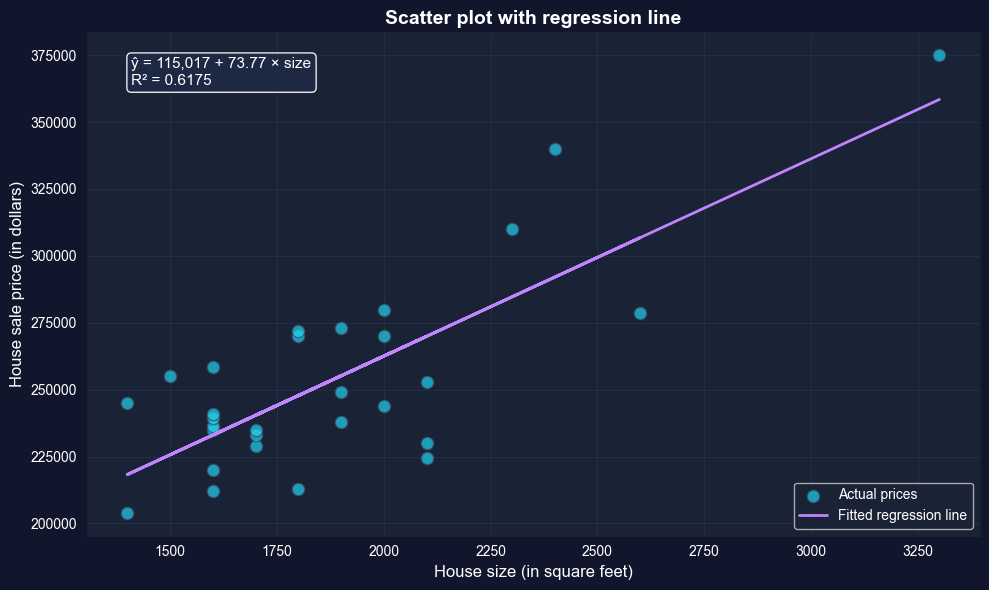


The blue line is the 'line of best fit'
It minimizes the sum of squared vertical distances from each point.


In [11]:
# Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(size, price, s=80, alpha=0.7, color='#22d3ee',
           edgecolor='#3a4a6b', label='Actual prices')
ax.plot(size, model.fittedvalues, color='#c084fc', linewidth=2, label='Fitted regression line')

# Add equation to plot
equation_text = f'ŷ = {intercept:,.0f} + {slope:.2f} × size\nR² = {r_squared:.4f}'
ax.text(0.05, 0.95, equation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#1e2a45', alpha=0.9))

ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('Scatter plot with regression line',
             fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe blue line is the 'line of best fit'")
print("It minimizes the sum of squared vertical distances from each point.")

### Special Case: Intercept-Only Regression

When we regress y on only an intercept (no x variable), the OLS estimate equals the sample mean of y. This shows that regression is a natural extension of univariate statistics.

In [12]:
# Intercept-only regression
model_intercept = ols('price ~ 1', data=data_house).fit()

print("=" * 70)
print("INTERCEPT-ONLY REGRESSION")
print("=" * 70)
print(f"Intercept from regression: ${model_intercept.params[0]:,.2f}")
print(f"Sample mean of price:      ${price.mean():,.2f}")
print("\nThese are equal, confirming that OLS generalizes the sample mean!")

INTERCEPT-ONLY REGRESSION
Intercept from regression: $253,910.34
Sample mean of price:      $253,910.34

These are equal, confirming that OLS generalizes the sample mean!


/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_14787/1986013926.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept from regression: ${model_intercept.params[0]:,.2f}")


## 5.6 Measures of Model Fit

Two key measures assess how well the regression line fits the data:

### R-squared (R²)
Proportion of variation in y explained by x (ranges from 0 to 1):

$$R^2 = \frac{\text{Explained SS}}{\text{Total SS}} = \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \bar{y})^2} = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

**Interpretation:**

- $R^2 = 0$: x explains none of the variation in y
- $R^2 = 1$: x explains all of the variation in y
- $R^2 = r^2$ (for simple regression, R² equals the squared correlation)

### Standard Error of the Regression (s_e)
Standard deviation of the residuals (typical size of prediction errors):

$$s_e = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

**Interpretation:**

- Lower $s_e$ means fitted values are closer to actual values
- Units: same as y (dollars in our example)
- Dividing by (n-2) accounts for estimation of two parameters

In [13]:
# Compute model fit measures
print("=" * 70)
print("MEASURES OF MODEL FIT")
print("=" * 70)

r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
se = np.sqrt(model.mse_resid)
n = len(data_house)

print(f"\nR-squared:               {r_squared:.4f}")
print(f"  {r_squared*100:.2f}% of price variation explained by size")

print(f"\nAdjusted R-squared:      {adj_r_squared:.4f}")
print(f"  Penalizes for number of regressors")

print(f"\nStandard error (s_e):    ${se:,.2f}")
print(f"  Typical prediction error is about ${se:,.0f}")

# Verify R² = r²
r = corr_matrix.loc['price', 'size']
print(f"\nVerification: R² = r²")
print(f"  R² = {r_squared:.4f}")
print(f"  r² = {r**2:.4f}")
print(f"  Match: {np.isclose(r_squared, r**2)}")

MEASURES OF MODEL FIT

R-squared:               0.6175
  61.75% of price variation explained by size

Adjusted R-squared:      0.6033
  Penalizes for number of regressors

Standard error (s_e):    $23,550.66
  Typical prediction error is about $23,551

Verification: R² = r²
  R² = 0.6175
  r² = 0.6175
  Match: True


> **Key Concept 5.6: R-Squared Goodness of Fit**
>
> R-squared measures the fraction of variation in y explained by the regression on x. It ranges from 0 (no explanatory power) to 1 (perfect fit). For bivariate regression, R² equals the squared correlation coefficient (R² = r²ₓᵧ). R² = 0.62 means 62% of house price variation is explained by size variation, while 38% is due to other factors.

**Transition Note:** We've estimated the regression line. Now we assess how well this line fits the data using R-squared (proportion of variation explained) and the standard error of regression (typical prediction error).

**Understanding R² = 0.617 and Standard Error = \$23,162**

**1. R-squared (coefficient of determination):**

- **Value**: 0.617 or 61.7%
- **Meaning**: Size explains 61.7% of the variation in house prices
- **The other 38.3%**: Due to factors not in our model (location, quality, age, etc.)

**How to think about R²:**

- **R² = 0**: x has no predictive power (horizontal line)
- **R² = 0.617**: x has substantial predictive power (our case)
- **R² = 1**: x predicts y perfectly (all points on the line)

**Is R² = 0.617 "good"?**

- **For cross-sectional data**: Yes, this is quite good!
- **Context matters**: 
 - Lab experiments: Often R² > 0.9
 - Cross-sectional economics: R² = 0.2-0.6 is typical
 - Time series: R² = 0.7-0.95 is common

- **Single predictor**: Size alone explains most variation — impressive!

**2. Standard error: \$23,162**

- **Meaning**: Typical prediction error (residual size)
- **Context**: 
 - Average house price: \$253,910
 - Typical error: \$23,162 (about 9% of average)
 - This is reasonably accurate for house price prediction

**3. Verification: R² = r²**

- Correlation: r = 0.7858
- R-squared: R² = 0.617
- Check: (0.7858)² = 0.617 
- For simple regression, these are always equal

**4. Sum of Squares decomposition:**
```
Total SS = Explained SS + Residual SS
100% = 61.7% + 38.3%
```

**Practical implications:**

- **For predictions**: Expect errors around ±\$23,000
- **For policy**: Size is important, but other factors matter too
- **For research**: May want to add more variables (multiple regression, Chapters 10-12)

### Illustration: Total SS, Explained SS, and Residual SS

Let's create a simple example to visualize how R² is computed.

In [14]:
# Simulated data for demonstration
np.random.seed(123456)
x_sim = np.arange(1, 6)
epsilon = np.random.normal(0, 2, 5)
y_sim = 1 + 2*x_sim + epsilon

df_sim = pd.DataFrame({'x': x_sim, 'y': y_sim})
model_sim = ols('y ~ x', data=df_sim).fit()

print("=" * 70)
print("SIMULATED DATA FOR MODEL FIT ILLUSTRATION")
print("=" * 70)
print(f"\n{'x':<5} {'y':<10} {'ŷ':<10} {'Residual (e)':<15} {'(y - ȳ)':<10} {'(ŷ - ȳ)':<10}")
print("-" * 70)
for i in range(len(x_sim)):
    print(f"{x_sim[i]:<5} {y_sim[i]:<10.4f} {model_sim.fittedvalues[i]:<10.4f} "
          f"{model_sim.resid[i]:<15.4f} {y_sim[i] - y_sim.mean():<10.4f} "
          f"{model_sim.fittedvalues[i] - y_sim.mean():<10.4f}")

print(f"\nSums of Squares:")
total_ss = np.sum((y_sim - y_sim.mean())**2)
explained_ss = np.sum((model_sim.fittedvalues - y_sim.mean())**2)
residual_ss = np.sum(model_sim.resid**2)

print(f"  Total SS     = {total_ss:.4f}")
print(f"  Explained SS = {explained_ss:.4f}")
print(f"  Residual SS  = {residual_ss:.4f}")
print(f"\nCheck: Explained SS + Residual SS = {explained_ss + residual_ss:.4f}")
print(f"       Total SS                     = {total_ss:.4f}")

print(f"\nR² = Explained SS / Total SS = {explained_ss / total_ss:.4f}")
print(f"R² from model = {model_sim.rsquared:.4f}")

SIMULATED DATA FOR MODEL FIT ILLUSTRATION

x     y          ŷ          Residual (e)    (y - ȳ)    (ŷ - ȳ)   
----------------------------------------------------------------------
1     3.9382     2.2482     1.6900          -2.5632    -4.2533   
2     4.4343     4.3748     0.0595          -2.0672    -2.1266   
3     3.9819     6.5015     -2.5196         -2.5196    -0.0000   
4     6.7287     8.6281     -1.8994         0.2273     2.1266    
5     13.4242    10.7548    2.6695          6.9228     4.2533    

Sums of Squares:
  Total SS     = 65.1680
  Explained SS = 45.2262
  Residual SS  = 19.9418

Check: Explained SS + Residual SS = 65.1680
       Total SS                     = 65.1680

R² = Explained SS / Total SS = 0.6940
R² from model = 0.6940


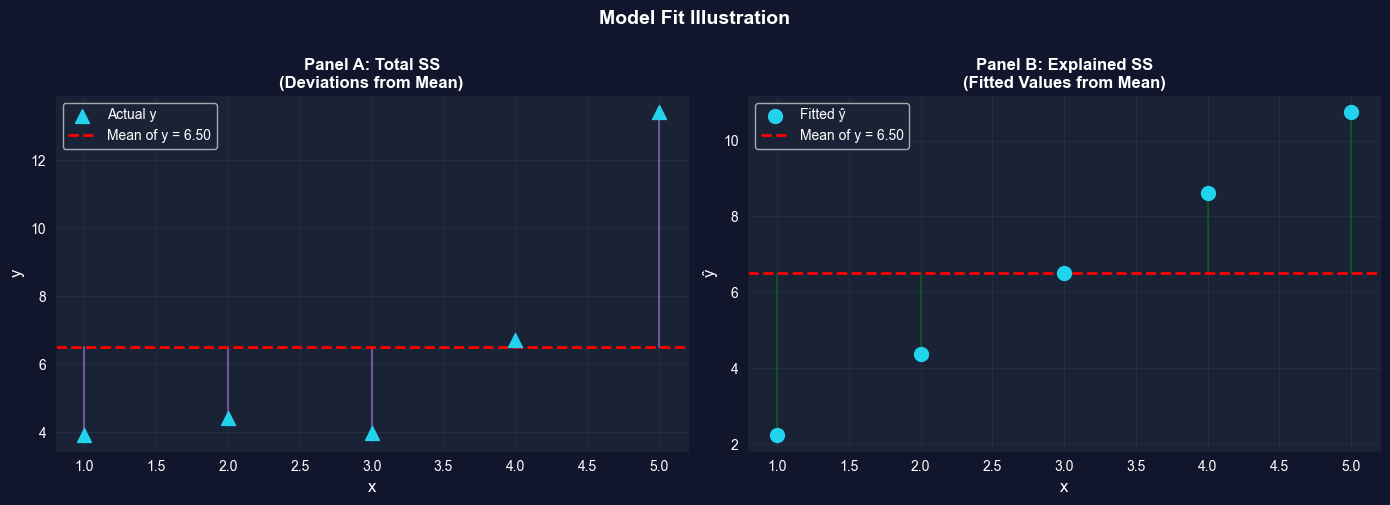


Panel A shows Total SS: how far actual y values are from their mean
Panel B shows Explained SS: how far fitted values are from the mean
R² = (Explained SS) / (Total SS) measures the proportion explained


In [15]:
# Visualization of model fit
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Total SS (deviations from mean)
axes[0].scatter(x_sim, y_sim, s=100, color='#22d3ee', marker='^', label='Actual y', zorder=3)
axes[0].axhline(y=y_sim.mean(), color='red', linewidth=2, linestyle='--',
                label=f'Mean of y = {y_sim.mean():.2f}', zorder=2)
# Draw vertical lines from points to mean
for i in range(len(x_sim)):
    axes[0].plot([x_sim[i], x_sim[i]], [y_sim[i], y_sim.mean()],
                 '-', color='#c084fc', linewidth=1.5, alpha=0.5, zorder=1)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Panel A: Total SS\n(Deviations from Mean)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Explained SS (deviations of fitted values from mean)
axes[1].scatter(x_sim, model_sim.fittedvalues, s=100, color='#22d3ee',
                marker='o', label='Fitted ŷ', zorder=3)
axes[1].axhline(y=y_sim.mean(), color='red', linewidth=2, linestyle='--',
                label=f'Mean of y = {y_sim.mean():.2f}', zorder=2)
# Draw vertical lines from fitted values to mean
for i in range(len(x_sim)):
    axes[1].plot([x_sim[i], x_sim[i]], [model_sim.fittedvalues[i], y_sim.mean()],
                 'g-', linewidth=1.5, alpha=0.5, zorder=1)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('ŷ', fontsize=12)
axes[1].set_title('Panel B: Explained SS\n(Fitted Values from Mean)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Model Fit Illustration',
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nPanel A shows Total SS: how far actual y values are from their mean")
print("Panel B shows Explained SS: how far fitted values are from the mean")
print("R² = (Explained SS) / (Total SS) measures the proportion explained")

**Practical Implications of R² in Economics:**

In applied econometrics, R² values around 0.60 are considered quite strong for cross-sectional data. Our R² = 0.617 tells us:

- **Size is a major determinant**: House size explains most of the price variation
- **Other factors matter**: The remaining 38% is due to location, quality, age, amenities, etc.
- **Single-variable limits**: One predictor can only explain so much in complex real-world data

**Why R² varies by context:**

- **Lab experiments**: Often R² > 0.90 (controlled conditions, few confounding factors)
- **Cross-sectional economics**: Typically R² = 0.20-0.60 (many unobserved heterogeneities)
- **Time series data**: Often R² = 0.70-0.95 (trends and persistence dominate)

**Next step:** This motivates **multiple regression** (Chapters 10-12), where we include many explanatory variables simultaneously to capture more of the variation in y.

## 5.7 Computer Output Following Regression

Modern statistical software provides comprehensive regression output. Let's examine each component of the output for our house price regression.

**Understanding Prediction Uncertainty:**

Our prediction ŷ = $262,559 for a 2,000 sq ft house is a **point estimate** — our best single guess. But predictions have uncertainty:

**Sources of uncertainty:**

- **Estimation error**: We don't know the true β₁ and β₂, only estimates b₁ and b₂
- **Fundamental randomness**: Even houses of identical size sell for different prices
- **Model limitations**: Our simple model omits many price determinants

**Preview of Chapter 7**: We'll learn to construct **prediction intervals** like:

- "We're 95% confident the price will be between $215,000 and $310,000"
- This acknowledges uncertainty while still providing useful guidance

For now, remember: the standard error ($23,551) gives a rough sense of typical prediction errors.

In [16]:
# Display full regression output
print("=" * 70)
print("COMPLETE REGRESSION OUTPUT")
print("=" * 70)
print(model.summary())

print("\n" + "=" * 70)
print("GUIDE TO REGRESSION OUTPUT")
print("=" * 70)

print("\n1. TOP SECTION - Model Summary:")
print(f"   • Dep. Variable: price (what we're predicting)")
print(f"   • No. Observations: {int(model.nobs)} (sample size)")
print(f"   • R-squared: {model.rsquared:.4f} (goodness of fit)")
print(f"   • F-statistic: {model.fvalue:.2f} (overall significance)")

print("\n2. MIDDLE SECTION - Coefficients Table:")
print(f"   • coef: Estimated slope and intercept")
print(f"   • std err: Standard error (precision measure)")
print(f"   • t: t-statistic for testing H₀: coefficient = 0")
print(f"   • P>|t|: p-value for significance test")
print(f"   • [0.025  0.975]: 95% confidence interval")

print("\n3. BOTTOM SECTION - Diagnostic Tests:")
print(f"   • Omnibus: Test for normality of residuals")
print(f"   • Durbin-Watson: Test for autocorrelation")
print(f"   • Jarque-Bera: Another normality test")
print(f"   • Cond. No.: Multicollinearity diagnostic")

COMPLETE REGRESSION OUTPUT
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     43.58
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           4.41e-07
Time:                        22:12:32   Log-Likelihood:                -332.05
No. Observations:                  29   AIC:                             668.1
Df Residuals:                      27   BIC:                             670.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.15e+05   2

## 5.8 Prediction and Outliers

Once we have a fitted regression line, we can use it to predict y for any given value of x:

$$\hat{y} = b_1 + b_2 x^*$$

**Two types of predictions:**

1. **In-sample:** x is within the range of observed data (reliable)
2. **Out-of-sample:** x is outside the observed range (extrapolation - use with caution)

**Outliers** are observations that are unusually far from the regression line. They may indicate:

- Data entry errors
- Unusual circumstances
- Model misspecification
- Natural variation

In [17]:
# Prediction example
print("=" * 70)
print("PREDICTION EXAMPLES")
print("=" * 70)

# Predict for a 2000 sq ft house
new_size = pd.DataFrame({'size': [2000]})
predicted_price = model.predict(new_size)

print(f"\nExample 1: Predict price for a 2,000 sq ft house")
print(f"  Using the model: ŷ = {intercept:.2f} + {slope:.2f} × 2000")
print(f"  Predicted price: ${predicted_price.values[0]:,.2f}")

# Manual calculation
manual_prediction = intercept + slope * 2000
print(f"  Manual check: ${manual_prediction:,.2f}")

# Multiple predictions
print(f"\nExample 2: Predictions for various house sizes")
sizes_to_predict = [1500, 1800, 2000, 2500, 3000]
predictions = pd.DataFrame({'size': sizes_to_predict})
predictions['predicted_price'] = model.predict(predictions)

print(predictions.to_string(index=False))

print(f"\nObserved size range: {size.min():.0f} to {size.max():.0f} sq ft")
print(f"  1500, 1800, 2000 are in-sample (reliable)")
print(f"  3000 is at the edge; 3500+ would be extrapolation (less reliable)")

PREDICTION EXAMPLES

Example 1: Predict price for a 2,000 sq ft house
  Using the model: ŷ = 115017.28 + 73.77 × 2000
  Predicted price: $262,559.36
  Manual check: $262,559.36

Example 2: Predictions for various house sizes
 size  predicted_price
 1500    225673.843168
 1800    247805.155280
 2000    262559.363354
 2500    299444.883540
 3000    336330.403727

Observed size range: 1400 to 3300 sq ft
  1500, 1800, 2000 are in-sample (reliable)
  3000 is at the edge; 3500+ would be extrapolation (less reliable)


**Example prediction: 2,000 sq ft house**

**Predicted price: \$262,559**

Using our regression equation:
```
ŷ = \$115,017 + \$73.77 × 2,000 = \$262,559
```

**How reliable is this prediction?**

**1. In-sample vs. out-of-sample:**

- Our data range: 1,400 to 3,300 sq ft
- Prediction at 2,000 sq ft: **in-sample** (safe)
- Prediction at 5,000 sq ft: **out-of-sample** (risky extrapolation)

**2. Prediction accuracy:**

- Standard error: \$23,162
- Typical error: about ±\$23,000 around the prediction
- **Informal prediction interval**: roughly \$239,000 to \$286,000
- (Chapter 7 will cover formal prediction intervals)

**3. Why predictions aren't perfect:**

- Our model only includes size
- Missing factors affect individual houses:
  - Neighborhood quality
  - Number of bathrooms
  - Lot size
  - Age and condition
  - Unique features

**Understanding residuals:**

A **residual** is the prediction error for one observation:
```
residual = actual price - predicted price
         = y - ŷ
```

**Positive residual**: House sold for MORE than predicted (underestimate)
**Negative residual**: House sold for LESS than predicted (overestimate)

**Why do some houses have large residuals?**

- Particularly desirable/undesirable location
- Exceptional quality or poor condition
- Unique features not captured by size alone
- May indicate measurement error or unusual circumstances

**Key insight:** The regression line gives the **average** relationship. Individual houses deviate from this average based on their unique characteristics.

In [18]:
# Identify potential outliers using residuals
print("\n" + "=" * 70)
print("OUTLIER DETECTION")
print("=" * 70)

# Add residuals and standardized residuals to dataset
data_house['fitted'] = model.fittedvalues
data_house['residual'] = model.resid
data_house['std_resid'] = model.resid / model.resid.std()

# Observations with large residuals (>2 std deviations)
outliers = data_house[np.abs(data_house['std_resid']) > 2]

print(f"\nObservations with large residuals (|standardized residual| > 2):")
if len(outliers) > 0:
    print(outliers[['price', 'size', 'fitted', 'residual', 'std_resid']])
else:
    print("  None found (all residuals within 2 standard deviations)")

print(f"\nTop 5 largest residuals (in absolute value):")
top_residuals = data_house.nlargest(5, 'residual', keep='all')[['price', 'size', 'fitted', 'residual']]
print(top_residuals)


OUTLIER DETECTION

Observations with large residuals (|standardized residual| > 2):
     price  size         fitted      residual  std_resid
27  340000  2400  292067.779503  47932.220497   2.072629

Top 5 largest residuals (in absolute value):
     price  size         fitted      residual
27  340000  2400  292067.779503  47932.220497
18  255000  1500  225673.843168  29326.156832
15  245000  1400  218296.739130  26703.260870
19  258500  1600  233050.947205  25449.052795
26  310000  2300  284690.675466  25309.324534


## 5.9 Regression and Correlation

There's a close relationship between the regression slope and the correlation coefficient:

$$b_2 = r_{xy} \times \frac{s_y}{s_x}$$

**Key insights:**

- $r_{xy} > 0 \Rightarrow b_2 > 0$ (positive correlation means positive slope)
- $r_{xy} < 0 \Rightarrow b_2 < 0$ (negative correlation means negative slope)
- $r_{xy} = 0 \Rightarrow b_2 = 0$ (zero correlation means zero slope)

**But regression and correlation differ:**

- Correlation treats x and y symmetrically: $r_{xy} = r_{yx}$
- Regression does not: slope from regressing y on x $\neq$ inverse of slope from regressing x on y

**Why This Relationship Matters:**

The formula **b₂ = r × (sᵧ/sₓ)** reveals an important insight about the connection between correlation and regression:

**Correlation (r):**

- Scale-free measure (unitless)
- Same value regardless of measurement units
- Symmetric: r(price, size) = r(size, price)

**Regression slope (b₂):**

- Scale-dependent (has units: $/sq ft in our example)
- Changes when we rescale variables
- Asymmetric: slope from price~size ≠ inverse of slope from size~price

**The ratio (sᵧ/sₓ):**

- Converts between correlation and slope
- Accounts for the relative variability of y and x
- Explains why slopes have interpretable units while r does not

**Practical implication:** This is why we use **regression** (not just correlation) in economics—we need interpretable coefficients with units ($/sq ft, % change, etc.) to make policy recommendations and predictions.

In [19]:
# Verify relationship between slope and correlation
print("=" * 70)
print("RELATIONSHIP: SLOPE = CORRELATION × (SD_Y / SD_X)")
print("=" * 70)

r = corr_matrix.loc['price', 'size']
s_y = price.std()
s_x = size.std()
b2_from_r = r * (s_y / s_x)

print(f"\nFrom regression:")
print(f"  Slope (b₂) = {slope:.4f}")

print(f"\nFrom correlation:")
print(f"  r = {r:.4f}")
print(f"  s_y = {s_y:.4f}")
print(f"  s_x = {s_x:.4f}")
print(f"  b₂ = r × (s_y / s_x) = {r:.4f} × ({s_y:.4f} / {s_x:.4f}) = {b2_from_r:.4f}")

print(f"\nMatch: {np.isclose(slope, b2_from_r)}")

RELATIONSHIP: SLOPE = CORRELATION × (SD_Y / SD_X)

From regression:
  Slope (b₂) = 73.7710

From correlation:
  r = 0.7858
  s_y = 37390.7107
  s_x = 398.2721
  b₂ = r × (s_y / s_x) = 0.7858 × (37390.7107 / 398.2721) = 73.7710

Match: True


## 5.10 Causation

**Critical distinction:** Regression measures **association**, not **causation**.

Our regression shows that larger houses are associated with higher prices. But we cannot conclude that:

- Adding square footage to a house will increase its price by \$73.77 per sq ft

**Why not?**

- **Omitted variables:** Many factors affect price (location, quality, age, condition)
- **Reverse causality:** Could price influence size? (e.g., builders construct larger houses in expensive areas)
- **Confounding:** A third variable (e.g., neighborhood quality) may influence both size and price

**Demonstrating non-symmetry: Reverse regression**

If we regress x on y (instead of y on x), we get a different slope:

- Original: $\hat{y} = b_1 + b_2 x$
- Reverse: $\hat{x} = c_1 + c_2 y$

These two regressions answer different questions and have different slopes!

> **Key Concept 5.7: Association vs. Causation**
>
> Regression measures association, not causation. A regression coefficient shows how much y changes when x changes, but does not prove that x causes y. Causation requires additional assumptions, experimental design, or advanced econometric techniques (Chapter 17). Regression is directional and asymmetric: regressing y on x gives a different slope than regressing x on y.

**Transition Note:** We've learned how to measure and quantify relationships. Now we address a critical question: does association imply causation? This distinction is fundamental to interpreting regression results correctly.

In [20]:
# Reverse regression: size ~ price
print("=" * 70)
print("REVERSE REGRESSION: DEMONSTRATING NON-SYMMETRY")
print("=" * 70)

reverse_model = ols('size ~ price', data=data_house).fit()

print("\nOriginal Regression (price ~ size):")
print(f"  ŷ = {model.params['Intercept']:,.2f} + {model.params['size']:.4f} × size")
print(f"  Slope: {model.params['size']:.4f}")
print(f"  R-squared: {model.rsquared:.4f}")

print("\nReverse Regression (size ~ price):")
print(f"  x̂ = {reverse_model.params['Intercept']:.2f} + {reverse_model.params['price']:.6f} × price")
print(f"  Slope: {reverse_model.params['price']:.6f}")
print(f"  R-squared: {reverse_model.rsquared:.4f}")

print("\nComparison:")
print(f"  1 / b₂ = 1 / {model.params['size']:.4f} = {1/model.params['size']:.6f}")
print(f"  c₂ = {reverse_model.params['price']:.6f}")
print(f"  Are they equal? {np.isclose(1/model.params['size'], reverse_model.params['price'])}")

print("\nKey insight:")
print("  • Original slope: $1 increase in size → ${:.2f} increase in price".format(model.params['size']))
print("  • Reverse slope: $1 increase in price → {:.6f} sq ft increase in size".format(reverse_model.params['price']))
print("  • These answer different questions!")

print("\nNote: Both regressions have the same R² because in simple regression,")
print("      R² = r² regardless of which variable is on the left-hand side.")

REVERSE REGRESSION: DEMONSTRATING NON-SYMMETRY

Original Regression (price ~ size):
  ŷ = 115,017.28 + 73.7710 × size
  Slope: 73.7710
  R-squared: 0.6175

Reverse Regression (size ~ price):
  x̂ = -242.44 + 0.008370 × price
  Slope: 0.008370
  R-squared: 0.6175

Comparison:
  1 / b₂ = 1 / 73.7710 = 0.013555
  c₂ = 0.008370
  Are they equal? False

Key insight:
  • Original slope: $1 increase in size → $73.77 increase in price
  • Reverse slope: $1 increase in price → 0.008370 sq ft increase in size
  • These answer different questions!

Note: Both regressions have the same R² because in simple regression,
      R² = r² regardless of which variable is on the left-hand side.


**CRITICAL DISTINCTION: Association ≠ Causation**

**What our regression shows:**
```
price = 115,017 + 73.77 × size
```

**What we CAN say:**

- Larger houses are **associated with** higher prices
- Size and price move together in a predictable way
- We can **predict** price from size with reasonable accuracy

**What we CANNOT say:**

- Adding square footage to your house will increase its value by exactly \$73.77 per sq ft
- Size **causes** the price to be higher
- Buying a bigger house will make it worth more

**Why not? Three reasons:**

**1. Omitted variables (confounding)**

- Many factors affect BOTH size and price:
  - **Neighborhood quality**: Rich neighborhoods have larger, more expensive houses
  - **Lot size**: Bigger lots allow bigger houses AND command higher prices
  - **Build quality**: High-quality construction → larger AND more expensive
- The \$73.77 coefficient captures both direct effects of size AND correlated factors

**2. Reverse causality**

- Our model: size → price
- Alternative: price → size? 
  - In expensive areas, builders construct larger houses because buyers can afford them
  - The causal arrow may run both ways

**3. Measurement of different concepts**

- **Cross-sectional comparison**: 2,000 sq ft house vs. 1,500 sq ft house (different houses)
- **Causal question**: What happens if we ADD 500 sq ft to ONE house?
- These are different questions with potentially different answers!

**The reverse regression demonstration:**

**Original**: price ~ size

- Slope: \$73.77 per sq ft

**Reverse**: size ~ price  

- Slope: 0.00837 sq ft per dollar

**Key observation:**

- If regression = causation, these should be reciprocals
- 1 / 73.77 = 0.01355 ≠ 0.00837
- They're NOT reciprocals! This reveals regression measures association, not causation

**When can we claim causation?**

- **Randomized experiments**: Randomly assign house sizes
- **Natural experiments**: Find exogenous variation in size
- **Careful econometric methods**: Instrumental variables, difference-in-differences, etc. (advanced topics)

**Economic intuition:** In reality, building an addition probably DOES increase house value, but perhaps not by exactly \$73.77/sq ft. The true causal effect depends on quality, location, and market conditions — factors our simple regression doesn't isolate.

## 5.11 Nonparametric Regression

**Parametric regression** (like OLS) assumes a specific functional form (e.g., linear).

**Nonparametric regression** allows the relationship to be more flexible, letting the data determine the shape without imposing a specific functional form.

**Common methods:**

1. **LOWESS** (Locally Weighted Scatterplot Smoothing): Fits weighted regressions in local neighborhoods
2. **Kernel smoothing:** Weighted averages using kernel functions
3. **Splines:** Piecewise polynomials

**Uses:**

- Exploratory data analysis
- Checking linearity assumption
- Flexible modeling when functional form is unknown

**When to Use Nonparametric vs. Parametric Regression:**

**Use parametric (OLS linear regression) when:**

- Theory suggests a linear relationship
- You need interpretable coefficients ($73.77 per sq ft)
- Sample size is small to moderate (n < 100)
- You want statistical inference (t-tests, confidence intervals)

**Use nonparametric (LOWESS, kernel) when:**

- Exploring data without strong prior assumptions
- Checking whether linear model is appropriate (diagnostic)
- Relationship appears curved or complex
- Large sample size (n > 100) provides enough data for flexible fitting

**Best practice**: Start with scatter plot + nonparametric curve to check for nonlinearity, then use parametric model if linear assumption is reasonable.

NONPARAMETRIC REGRESSION


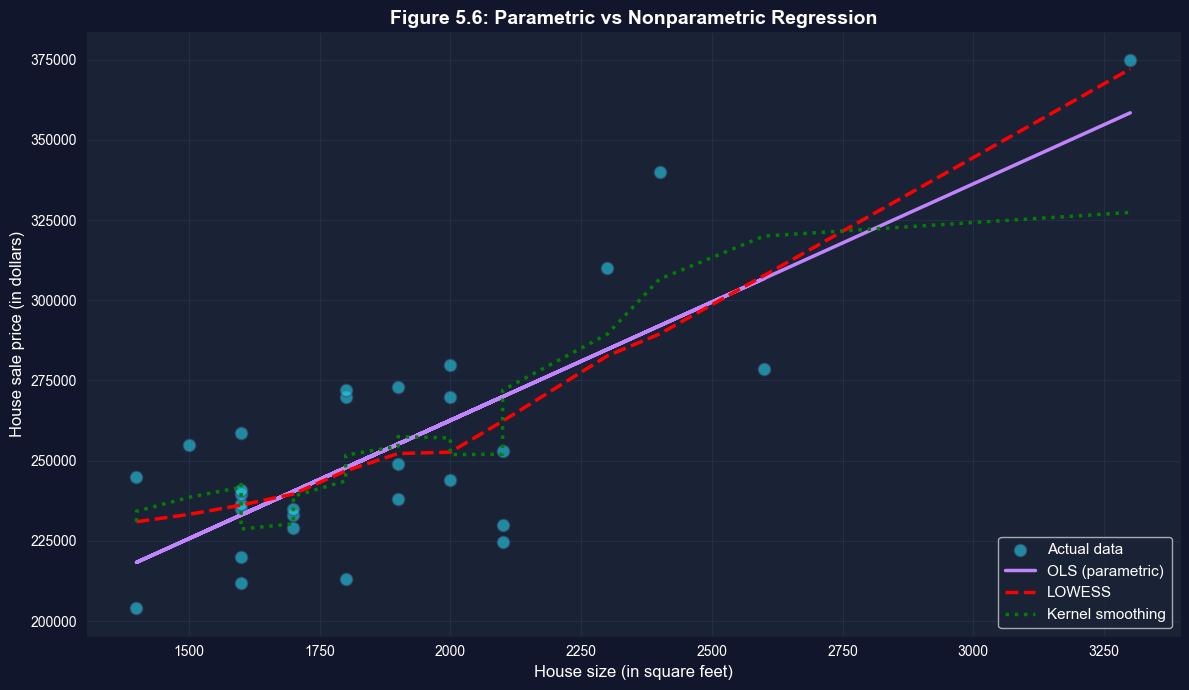


Interpretation:
• OLS (blue solid): Assumes linear relationship
• LOWESS (red dashed): Flexible, data-driven curve
• Kernel smoothing (green dotted): Another flexible method

For this data, all three methods are similar, suggesting
that the linear model is a reasonable approximation.


In [21]:
# Nonparametric regression
print("=" * 70)
print("NONPARAMETRIC REGRESSION")
print("=" * 70)

# LOWESS smoothing
lowess_result = lowess(price, size, frac=0.6)

# Kernel smoothing (Gaussian filter approximation)
sort_idx = np.argsort(size)
size_sorted = size.iloc[sort_idx]
price_sorted = price.iloc[sort_idx]
sigma = 2  # bandwidth parameter
price_smooth = gaussian_filter1d(price_sorted, sigma)

# Plot comparison
fig, ax = plt.subplots(figsize=(12, 7))

# Scatter plot
ax.scatter(size, price, s=80, alpha=0.6, color='#22d3ee',
           edgecolor='#3a4a6b', label='Actual data', zorder=1)

# OLS line
ax.plot(size, model.fittedvalues, color='#c084fc', linewidth=2.5,
        label='OLS (parametric)', zorder=2)

# LOWESS
ax.plot(lowess_result[:, 0], lowess_result[:, 1], color='red',
        linewidth=2.5, linestyle='--', label='LOWESS', zorder=3)

# Kernel smoothing
ax.plot(size_sorted, price_smooth, color='green', linewidth=2.5,
        linestyle=':', label='Kernel smoothing', zorder=4)

ax.set_xlabel('House size (in square feet)', fontsize=12)
ax.set_ylabel('House sale price (in dollars)', fontsize=12)
ax.set_title('Figure 5.6: Parametric vs Nonparametric Regression',
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("• OLS (blue solid): Assumes linear relationship")
print("• LOWESS (red dashed): Flexible, data-driven curve")
print("• Kernel smoothing (green dotted): Another flexible method")
print("\nFor this data, all three methods are similar, suggesting")
print("that the linear model is a reasonable approximation.")

**Comparing three approaches to fitting the data:**

**1. OLS (Ordinary Least Squares) — BLUE LINE**

- **Parametric**: Assumes linear relationship
- **Equation**: ŷ = \$115,017 + \$73.77 × size
- **Advantage**: Simple, interpretable, efficient
- **Limitation**: Restricted to straight lines

**2. LOWESS (Locally Weighted Scatterplot Smoothing) — RED DASHED**

- **Nonparametric**: Lets data determine the shape
- **Method**: Fits weighted regressions in local neighborhoods
- **Advantage**: Flexible, can capture curves
- **Limitation**: Harder to interpret, more complex

**3. Kernel Smoothing — GREEN DOTTED**

- **Nonparametric**: Weighted moving averages
- **Method**: Uses Gaussian kernel to smooth nearby points
- **Advantage**: Very smooth curves
- **Limitation**: Choice of bandwidth affects results

**What does this comparison tell us?**

**Key observation: All three lines are very similar!**

- LOWESS and kernel smoothing follow OLS closely
- No obvious systematic curvature
- The relationship appears genuinely linear

**This validates our linear model:**

- If nonparametric methods showed strong curvature, we'd question the linear assumption
- Since they align with OLS, the linear model is appropriate
- We can confidently use the simpler parametric approach

**When would nonparametric methods differ?**

**Example scenarios:**

- **Diminishing returns**: Price increases with size, but at a decreasing rate
- **Threshold effects**: Small houses have steep price-size relationship, large houses flatten
- **Nonlinear relationships**: Exponential, logarithmic, or polynomial patterns

**For our housing data:**

- Linear model works well
- Adding complexity (nonparametric) doesn't improve fit much
- **Occam's Razor**: Choose the simpler model when performance is similar

**Practical use of nonparametric methods:**

- **Exploratory analysis**: Check for nonlinearity before modeling
- **Model diagnostics**: Verify linear assumption
- **Flexible prediction**: When functional form is unknown
- **Complex relationships**: When theory doesn't suggest specific form

**Bottom line:** Nonparametric methods confirm that our linear regression is appropriate for this dataset. The relationship between house price and size is genuinely linear, not curved.

## Key Takeaways

### Visualization and Correlation

- **Two-way tabulations**, scatterplots, and correlation are essential first steps in bivariate analysis
- **Scatterplots** provide visual evidence of relationships and help identify direction, strength, form, and outliers
- Two-way tabulations with **expected frequencies** enable chi-squared tests of independence for categorical data
- The **correlation coefficient (r)** is a scale-free measure of linear association ranging from -1 to +1
- **Covariance** measures the direction of association but depends on the units of measurement
- For house price and size, **r = 0.786** indicates strong positive linear association
- **Autocorrelation** extends correlation to time series, measuring how a variable relates to its own past values

### Regression Analysis and Interpretation

- The **regression line** ŷ = b₁ + b₂x is estimated by **ordinary least squares (OLS)**, which minimizes the sum of squared residuals
- The **slope b₂** measures the change in y for a one-unit change in x and is the most important interpretable quantity
- For house prices, **b₂ = $73.77** means each additional square foot is associated with a $73.77 price increase
- The **intercept b₁** represents the predicted y when x = 0 (often not meaningful if x = 0 is outside the data range)
- **Residuals** (e = y - ŷ) measure prediction errors; OLS makes the sum of squared residuals as small as possible
- Regression of y on only an intercept yields the **sample mean** as the fitted value, showing OLS generalizes univariate statistics
- The formulas **b₂ = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²** and **b₁ = ȳ - b₂x̄** enable manual computation
- The regression slope equals **b₂ = rₓᵧ × (sᵧ/sₓ)**, connecting regression and correlation

### Model Fit and Evaluation

- **R-squared** measures the fraction of variation in y explained by x, ranging from 0 (no fit) to 1 (perfect fit)
- **R² = (Explained SS) / (Total SS) = 1 - (Residual SS) / (Total SS)**
- For bivariate regression, **R² = r²ₓᵧ** (squared correlation coefficient)
- For house prices, **R² = 0.618** means 62% of price variation is explained by size variation
- **Standard error of regression (sₑ)** measures the typical size of residuals in the units of y
- **Low R² doesn't mean regression is uninformative**—the coefficient can still be statistically significant and economically important
- R² depends on data aggregation and choice of dependent variable; use it to compare models with the **same dependent variable**
- Computer regression output provides coefficients, standard errors, t-statistics, p-values, F-statistics, and ANOVA decomposition

### Prediction, Causation, and Extensions

- **Predictions** use ŷ = b₁ + b₂x* to forecast y for a given x*
- **In-sample predictions** use observed x values (fitted values); **out-of-sample predictions** use new x values
- **Extrapolation** beyond the sample range of x can be unreliable
- **Outliers** can strongly influence regression estimates, especially if far from both x̄ and ȳ
- **Association does not imply causation**—regression measures correlation, not causal effects
- **Confounding variables**, reverse causality, or selection bias can create associations without causation
- Establishing **causation** requires experimental design, natural experiments, or advanced econometric techniques (Chapter 17)
- **Regression is directional and asymmetric**: regressing y on x gives a different slope than regressing x on y
- The two slopes are **NOT reciprocals**, reflecting that regression treats y and x differently
- **Nonparametric regression** (local linear, lowess) provides flexible alternatives without assuming linearity
- Nonparametric methods are useful for **exploratory analysis** and checking the appropriateness of linear models

### Connection to Economic Analysis

- The strong relationship (R² = 0.62) between size and price makes economic sense: buyers pay a premium for space
- The imperfect fit reminds us that **many factors beyond size affect house values** (location, quality, age, condition)
- Regression provides the **foundation for econometric analysis**, allowing us to quantify economic relationships
- This chapter's bivariate methods extend naturally to **multiple regression** (Chapters 10-12) with many explanatory variables
- Understanding association vs. causation is **critical for policy analysis** and program evaluation

**Congratulations!** You've mastered the basics of bivariate data analysis and simple linear regression. You now understand how to measure and visualize relationships between two variables, fit and interpret a regression line, assess model fit, and recognize the crucial distinction between association and causation. These tools form the foundation for all econometric analysis!

## Practice Exercises

Test your understanding of bivariate data analysis and regression with these exercises.

**Exercise 1: Correlation Interpretation**

Suppose the correlation between years of education and annual income is r = 0.35.

(a) What does this correlation tell us about the relationship between education and income?

(b) If we measured income in thousands of dollars instead of dollars, would the correlation change?

(c) Can we conclude that education causes higher income? Why or why not?

---

**Exercise 2: Computing Correlation**

Given the following data for variables x and y with n = 5 observations:

- Σ(xᵢ - x̄)(yᵢ - ȳ) = 20
- Σ(xᵢ - x̄)² = 50
- Σ(yᵢ - ȳ)² = 10

(a) Calculate the sample correlation coefficient r.

(b) Is this a strong, moderate, or weak correlation?

(c) Is the relationship positive or negative?

---

**Exercise 3: Regression Slope Calculation**

For the data in Exercise 2:

(a) Calculate the regression slope coefficient b₂ from regression of y on x.

(b) Verify the relationship: b₂ = r × (sᵧ / sₓ)

(c) If x̄ = 10 and ȳ = 25, calculate the intercept b₁.

---

**Exercise 4: R-squared Interpretation**

A regression of test scores on hours studied yields R² = 0.40.

(a) What percentage of test score variation is explained by hours studied?

(b) What percentage is due to other factors?

(c) Does this mean studying is not important? Explain.

(d) If the correlation is r = 0.632, verify that R² = r².

---

**Exercise 5: Prediction**

From the house price regression: ŷ = 115,017 + 73.77 × size

(a) Predict the price of a house with 2,200 square feet.

(b) Predict the price of a house with 5,000 square feet.

(c) Which prediction is more reliable? Why?

(d) If the standard error is $23,551, what does this tell us about prediction accuracy?

---

**Exercise 6: Residuals**

A house of 1,800 sq ft sold for $270,000. The regression predicts ŷ = $247,805.

(a) Calculate the residual for this observation.

(b) Is the actual price higher or lower than predicted?

(c) What might explain this large positive residual?

(d) Would you consider this an outlier? Why or why not?

---

**Exercise 7: Causation vs. Association**

Studies show that ice cream sales and crime rates are positively correlated.

(a) Does this mean ice cream causes crime? Explain.

(b) What might be a confounding variable?

(c) How would you design a study to test for causation?

(d) Give another example where correlation does not imply causation.

---

**Exercise 8: Python Practice**

Using the house price data or your own dataset:

(a) Create a scatterplot with a fitted regression line.

(b) Calculate the correlation coefficient using `pandas` `.corr()` method.

(c) Fit an OLS regression using `statsmodels` and interpret the output.

(d) Create residual plots to check for outliers.

(e) Compare OLS with LOWESS nonparametric regression.

---

**Solutions to selected exercises:**

- **Exercise 2a**: r = 20 / √(50 × 10) = 20 / √500 = 0.894
- **Exercise 3a**: b₂ = 20 / 50 = 0.4
- **Exercise 4a**: 40% explained, 60% due to other factors
- **Exercise 5a**: ŷ = 115,017 + 73.77 × 2,200 = $277,311

For complete solutions and additional practice problems, see the course website.

## Case Studies

Now that you've learned the fundamentals of bivariate analysis, correlation, and regression, let's apply these techniques to real economic research questions using the **Economic Convergence Clubs** dataset from Mendez (2020).

**Why case studies matter:**

- Bridge theory and application: Move from learning formulas to answering substantive economic questions
- Build analytical workflow: Practice the complete cycle from visualization to interpretation
- Develop critical thinking: Distinguish association from causation in real data
- Connect to research: See how econometric tools support published economic studies

### Case Study 1: Capital and Productivity Across Countries

**Research Question:** What is the relationship between capital per worker and labor productivity across countries? Does this relationship vary by income group?

**Background:** Traditional growth theory suggests that countries with more capital per worker should have higher labor productivity. This is the **capital-output relationship**—a fundamental concept in development economics. However, differences in technology, institutions, and human capital mean that capital alone doesn't fully explain productivity differences.

This research ([Mendez, 2020](https://github.com/quarcs-lab/mendez2020-convergence-clubs-code-data)) uses panel data from 108 countries to study convergence clubs in labor productivity. Rather than assuming all countries converge to a single equilibrium, the analysis identifies distinct groups (clubs) that converge toward different productivity levels.

**The Data:** We'll use the same dataset from Chapter 1, but now apply Chapter 5's bivariate tools:

- **Panel dataset:** 108 countries observed from 1990-2014 (2,700 country-year observations)
- **Key variables:**
 - `lp`: Labor productivity (output per worker, in 2011 USD PPP)
 - `kl`: Capital per worker (physical capital stock per worker)
 - `h`: Human capital index (based on years of schooling)
 - `TFP`: Total factor productivity (aggregate efficiency)
 - `hi1990`: High-income country indicator (as of 1990)
 - `region`: Regional classification

**Your Task:** Use Chapter 5's visualization, correlation, and regression tools to explore the capital-productivity relationship and test whether it differs across country groups.

> **Key Concept 5.8: Capital-Productivity Relationship**
>
> The regression of labor productivity on capital per worker quantifies the **capital-output elasticity**—how much productivity increases when capital per worker rises by 1%. In cross-country data, this relationship reflects both:
>
> 1. **Diminishing returns to capital** (holding technology constant)
> 2. **Technology differences** across countries (correlated with capital accumulation)
>
> Distinguishing these two effects requires controlling for other factors (human capital, TFP), which we'll learn in later chapters on multiple regression.

### How to Use These Tasks

**Progressive difficulty:**

- **Tasks 1-2:** Guided (detailed instructions, code provided)
- **Tasks 3-4:** Semi-guided (moderate guidance, you write most code)
- **Tasks 5-6:** Independent (minimal guidance, design your own analysis)

**Work incrementally:** Complete tasks in order. Each builds on previous skills.

**Learn by doing:** Modify code, experiment with variables, interpret results economically.

#### Task 1: Load and Explore the Data (Guided)

**Objective:** Load the convergence clubs dataset and generate descriptive statistics for key variables.

**Instructions:** Run the code below to load data and examine the structure.

```python
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Load convergence clubs dataset
df = pd.read_csv(
 "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv",
 index_col=["country", "year"]
).sort_index()

# Display dataset info
print(f"Dataset shape: {df.shape[0]} observations, {df.shape[1]} variables")
print(f"Countries: {len(df.index.get_level_values('country').unique())}")
print(f"Years: {df.index.get_level_values('year').min()} to {df.index.get_level_values('year').max()}")

# Preview first few observations
print("\nFirst 5 observations:")
print(df[['lp', 'kl', 'h', 'TFP', 'hi1990', 'region']].head())

# Generate descriptive statistics
print("\nDescriptive statistics (key variables):")
print(df[['lp', 'kl', 'h', 'TFP']].describe().round(2))
```

**What to observe:**

- How many observations? How many countries?
- What is the range of labor productivity (`lp`)? Capital per worker (`kl`)?
- Are there missing values in key variables?

#### Task 2: Visualize the Capital-Productivity Relationship (Semi-guided)

**Objective:** Create a scatterplot to visualize the relationship between capital per worker and labor productivity.

**Instructions:**

1. Prepare a subset of data with non-missing values for `lp` and `kl`
2. Create a scatterplot with capital per worker on the x-axis and labor productivity on the y-axis
3. Add appropriate labels and title
4. Interpret the pattern: positive/negative? Linear? Outliers?

**Starter code:**

```python
# Prepare data (remove missing values)
plot_data = df[['lp', 'kl']].dropna()

# Create scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(plot_data['kl'], plot_data['lp'], alpha=0.5, s=20)

# Add labels and formatting
ax.set_xlabel('Capital per Worker (thousands, 2011 USD PPP)', fontsize=12)
ax.set_ylabel('Labor Productivity (thousands, 2011 USD PPP)', fontsize=12)
ax.set_title('Capital per Worker vs. Labor Productivity (108 countries, 1990-2014)', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# What pattern do you see?
print("\n Interpretation:")
print("- Relationship: [Positive/Negative/No clear pattern]")
print("- Strength: [Strong/Moderate/Weak]")
print("- Outliers: [Yes/No] - [Describe if present]")
```

**Questions:**

- Is the relationship positive (as theory predicts)?
- Is it approximately linear, or curved?
- Are there countries with very high capital but moderate productivity (or vice versa)?

#### Task 3: Calculate the Correlation Coefficient (Semi-guided)

**Objective:** Quantify the strength of the linear relationship between capital and productivity using the correlation coefficient.

**Instructions:**

1. Calculate the Pearson correlation coefficient between `lp` and `kl`
2. Interpret the magnitude: Is it close to 0 (weak), 0.5 (moderate), or 1.0 (strong)?
3. Test statistical significance: Is the relationship likely due to chance?

**Hint:** Use `.corr()` method or `np.corrcoef()` function.

**Example structure:**

```python
# Calculate correlation
corr = plot_data[['lp', 'kl']].corr()
print("Correlation matrix:")
print(corr)

# Extract the correlation coefficient
r = corr.loc['lp', 'kl']
print(f"\nCorrelation between capital and productivity: r = {r:.4f}")

# Interpretation
print(f"\nInterpretation:")
print(f"- Magnitude: {'Strong' if abs(r) > 0.7 else 'Moderate' if abs(r) > 0.4 else 'Weak'}")
print(f"- Direction: {'Positive' if r > 0 else 'Negative'}")
print(f"- R² (shared variation): {r**2:.4f} ({r**2*100:.2f}%)")
```

**Questions:**

- How much of the variation in productivity is explained by capital?
- Does this match what you observed in the scatterplot?

#### Task 4: Estimate the Regression Line (More Independent)

**Objective:** Estimate an OLS regression of labor productivity on capital per worker and interpret the slope coefficient.

**Instructions:**

1. Prepare regression data (remove missing values, reset index if needed)
2. Estimate: `lp ~ kl` using `ols()` from statsmodels
3. Display the regression summary
4. Extract and interpret the slope coefficient economically
5. Report the R-squared value

**Key questions to answer:**

- What is the slope coefficient? Interpret it in economic terms.
- Is the coefficient statistically significant (p < 0.05)?
- What percentage of productivity variation is explained by capital?
- Does the relationship appear causal, or could there be omitted variables?

**Hint:** Remember to reset the index before regression if you're using formula syntax.

> **Key Concept 5.9: Interpreting Slope in Economic Context**
>
> The regression slope β₁ in `productivity = β₀ + β₁ × capital` measures the **average change in productivity (in thousands of USD) for each additional thousand USD of capital per worker**.
>
> In cross-country data, this captures both:
> - **True capital effect** (more machines → higher output)
> - **Confounding factors** (richer countries have both more capital AND better technology/institutions)
>
> To isolate the true capital effect, we need **multiple regression** (Chapters 6-9) to control for human capital, TFP, and other factors.

#### Task 5: Compare Relationships Across Income Groups (Independent)

**Objective:** Investigate whether the capital-productivity relationship differs between high-income and developing countries.

**Research Question:** Do high-income countries have a stronger/weaker capital-productivity association than developing countries?

**Instructions:**

1. Group the data by `hi1990` (high-income indicator)
2. Calculate the correlation coefficient for each group separately
3. Create comparative scatterplots (one color per group)
4. (Advanced) Run separate regressions for each group and compare slope coefficients
5. Interpret differences: Why might the relationship vary by income level?

**Hints:**

- Use `df.groupby('hi1990')` to split data
- Use different colors in scatter plot for each group
- Compare both correlations and regression slopes

**Expected findings:**

- High-income countries may show **weaker** capital-productivity correlation (approaching diminishing returns)
- Developing countries may show **stronger** correlation (still accumulating capital)
- Consider alternative explanations!

#### Task 6: Explore Alternative Relationships (Independent)

**Objective:** Investigate other bivariate relationships relevant to growth and convergence.

**Choose ONE of the following research questions:**

**Option A:** Human capital vs. productivity

- Research question: Does education (human capital) explain productivity differences?
- Variables: `lp` (productivity) and `h` (human capital index)
- Expected: Positive relationship, but possibly weaker than capital

**Option B:** TFP vs. productivity

- Research question: How much of productivity is driven by aggregate efficiency (TFP)?
- Variables: `lp` (productivity) and `TFP` (total factor productivity)
- Expected: Strong positive relationship (TFP is a key driver)

**Option C:** Time trend in productivity

- Research question: Has average global productivity increased over time?
- Variables: Year vs. average `lp` across all countries
- Expected: Positive trend, but with variation across countries

**Your analysis should include:**

1. Scatterplot with clear labels
2. Correlation coefficient
3. Regression results (slope, R², significance)
4. Economic interpretation: What does this relationship tell us about growth and development?

> **Key Concept 5.10: Correlation vs. Causation in Growth Economics**
>
> Our regressions show **associations**—capital and productivity move together. But association ≠ causation:
>
> 1. **Reverse causality:** Does capital cause productivity, or does high productivity enable more capital accumulation?
> 2. **Omitted variables:** Technology, institutions, geography, culture—all affect both capital and productivity
> 3. **Selection effects:** High-income countries differ systematically from developing countries in ways beyond capital
>
> Establishing causation requires:
> - **Controlled experiments** (rarely feasible for countries)
> - **Natural experiments** (e.g., policy changes, resource discoveries)
> - **Instrumental variables** (advanced econometric methods, Chapter 14-15)
>
> For now, interpret regression slopes as **descriptive associations**, not causal effects.

### What You've Learned from This Case Study

Through this hands-on exploration of capital and productivity across countries, you've applied all Chapter 5 tools:

 **Visualization:** Scatterplots reveal patterns before quantifying relationships

 **Correlation:** Pearson coefficient quantifies linear association strength

 **Regression:** OLS slope measures average change in Y per unit change in X

 **Interpretation:** Translated coefficients into economic meaning (dollars, percentages)

 **Model fit:** R-squared shows explanatory power (proportion of variation explained)

 **Comparative analysis:** Group comparisons reveal heterogeneity (relationships vary by income level)

 **Critical thinking:** Distinguished association from causation; recognized omitted variable bias

**Connection to the Research:** The patterns you've discovered—the capital-productivity relationship, differences across income groups, the role of TFP—are the empirical foundations for Mendez (2020)'s convergence clubs analysis. The full research uses advanced methods (nonparametric regression, clustering algorithms) to formally identify clubs, which you'll learn in later chapters.

**Looking ahead:**

- **Chapter 6-7:** Multiple regression to control for human capital, TFP, and other factors
- **Chapter 10-11:** Panel data methods to exploit time variation within countries
- **Chapter 15-17:** Advanced methods for causal inference and club detection

**Congratulations!** You've completed Chapter 5 and applied bivariate analysis to real cross-country growth data. Continue to Chapter 6 to learn how to extend regression analysis to multiple explanatory variables.

### Case Study 2: Nighttime Lights and Development: A Bivariate Exploration

In Chapter 1, we introduced the DS4Bolivia project and estimated a simple regression of development on nighttime lights. In this case study, we apply Chapter 5's bivariate tools—scatter plots, correlations, OLS regression, and model fit measures—to explore multiple satellite-development relationships in greater depth.

**Data**: Cross-sectional dataset covering 339 Bolivian municipalities from the [DS4Bolivia Project](https://github.com/quarcs-lab/ds4bolivia).

**Key variables**:

- `mun`: Municipality name
- `dep`: Department (administrative region)
- `imds`: Municipal Sustainable Development Index (0–100 composite)
- `ln_NTLpc2017`: Log nighttime lights per capita (2017)
- `index_sdg1`: SDG 1 Index — No Poverty (0–100)
- `index_sdg4`: SDG 4 Index — Quality Education (0–100)
- `index_sdg8`: SDG 8 Index — Decent Work and Economic Growth (0–100)
- `sdg7_1_ec`: SDG 7.1 — Electricity coverage (%)
- `sdg1_1_ubn`: Unsatisfied Basic Needs (% of population)

#### Task 1: Load and Explore (Guided)

**Objective**: Load the DS4Bolivia dataset, select key variables, and create a two-way frequency table.

**Instructions**:

1. Load the data from the URL below and select the key variables listed above
2. Use `pd.cut()` to bin the `imds` variable into three equal-frequency groups labeled **Low**, **Medium**, and **High** (terciles)
3. Create a two-way frequency table (cross-tabulation) of `imds` terciles against department using `pd.crosstab()`
4. Examine the table: Which departments have the most municipalities in the *Low* development category?

In [22]:
# Load the DS4Bolivia dataset
url_bol = "https://raw.githubusercontent.com/quarcs-lab/ds4bolivia/master/ds4bolivia_v20250523.csv"
bol = pd.read_csv(url_bol)

# Select key variables for this case study
key_vars = ['mun', 'dep', 'imds', 'ln_NTLpc2017',
            'index_sdg1', 'index_sdg4', 'index_sdg8',
            'sdg7_1_ec', 'sdg1_1_ubn']
bol_cs = bol[key_vars].copy()

print(f"Dataset: {bol_cs.shape[0]} municipalities, {bol_cs.shape[1]} variables")
print(f"Departments: {sorted(bol_cs['dep'].unique())}")
print()

# Bin imds into terciles
bol_cs['imds_group'] = pd.cut(bol_cs['imds'],
                               bins=3,
                               labels=['Low', 'Medium', 'High'])

# Two-way frequency table: imds tercile x department
cross_tab = pd.crosstab(bol_cs['imds_group'], bol_cs['dep'],
                        margins=True, margins_name='Total')
print("Two-Way Frequency Table: IMDS Tercile by Department")
print("=" * 70)
print(cross_tab)

Dataset: 339 municipalities, 9 variables
Departments: ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija']

Two-Way Frequency Table: IMDS Tercile by Department
dep         Beni  Chuquisaca  Cochabamba  La Paz  Oruro  Pando  Potosí  \
imds_group                                                               
Low            9          21          20      45     21     13      28   
Medium        10           7          22      40     13      2      11   
High           0           1           5       2      1      0       1   
Total         19          29          47      87     35     15      40   

dep         Santa Cruz  Tarija  Total  
imds_group                             
Low                 13       0    170  
Medium              43       9    157  
High                 0       2     12  
Total               56      11    339  


#### Task 2: Scatter Plots (Guided)

**Objective**: Create a 2×2 grid of scatter plots to compare different satellite-development relationships.

**Instructions**:

1. Create a figure with four subplots arranged in a 2×2 grid
2. Plot the following relationships:
   - (a) `ln_NTLpc2017` vs `imds`
   - (b) `ln_NTLpc2017` vs `index_sdg1`
   - (c) `ln_NTLpc2017` vs `sdg7_1_ec`
   - (d) `sdg1_1_ubn` vs `imds`

3. Add axis labels and subplot titles
4. Discuss: Which relationship appears strongest? Which appears weakest?

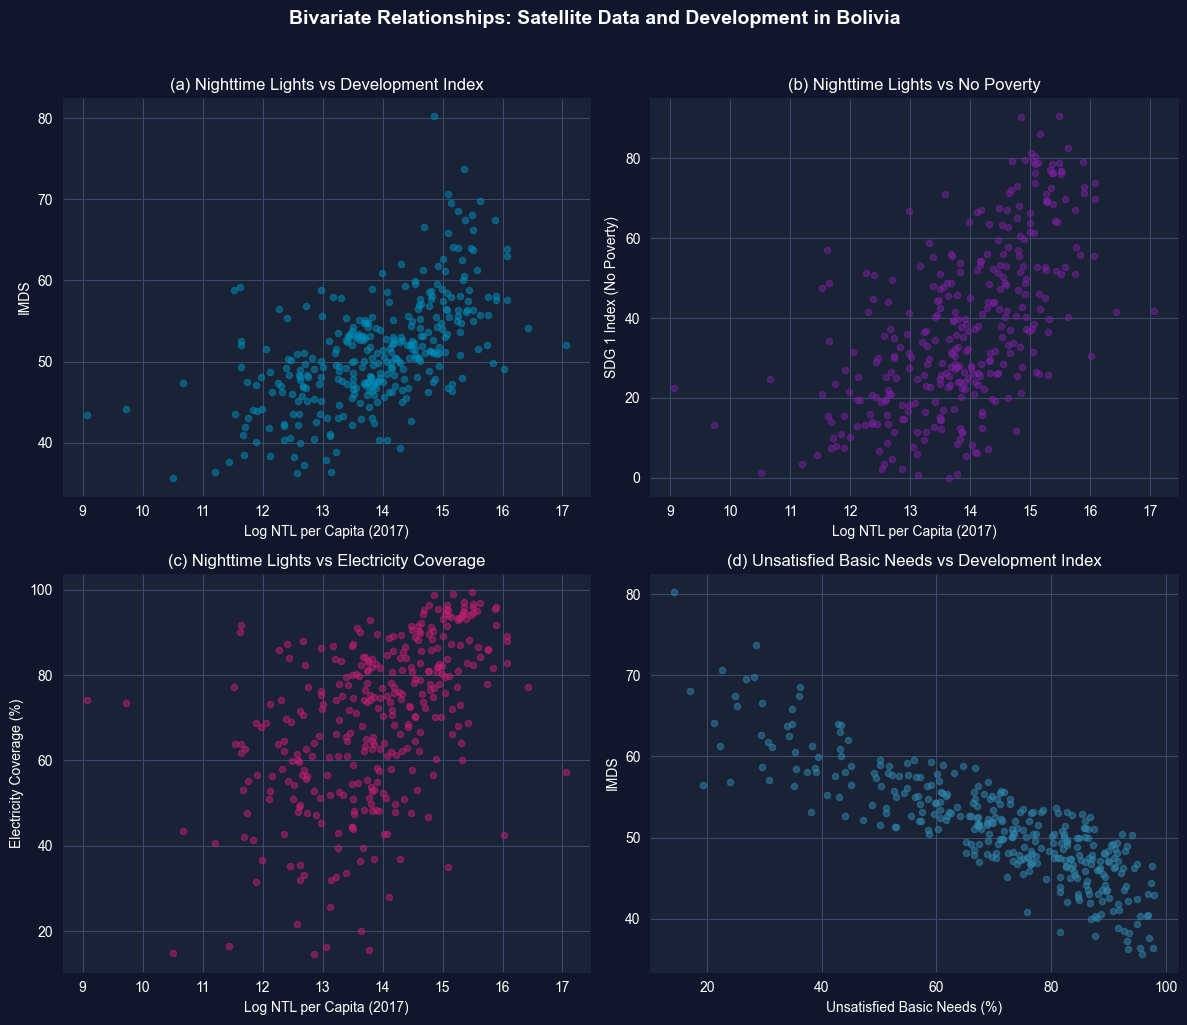

In [23]:
# 2x2 scatter plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_data = bol_cs.dropna(subset=['ln_NTLpc2017', 'imds', 'index_sdg1',
                                   'sdg7_1_ec', 'sdg1_1_ubn'])

# (a) NTL vs IMDS
axes[0, 0].scatter(plot_data['ln_NTLpc2017'], plot_data['imds'],
                   alpha=0.5, color='#008CB7', s=20)
axes[0, 0].set_xlabel('Log NTL per Capita (2017)')
axes[0, 0].set_ylabel('IMDS')
axes[0, 0].set_title('(a) Nighttime Lights vs Development Index')

# (b) NTL vs SDG1 (No Poverty)
axes[0, 1].scatter(plot_data['ln_NTLpc2017'], plot_data['index_sdg1'],
                   alpha=0.5, color='#7A209F', s=20)
axes[0, 1].set_xlabel('Log NTL per Capita (2017)')
axes[0, 1].set_ylabel('SDG 1 Index (No Poverty)')
axes[0, 1].set_title('(b) Nighttime Lights vs No Poverty')

# (c) NTL vs SDG7.1 (Electricity Coverage)
axes[1, 0].scatter(plot_data['ln_NTLpc2017'], plot_data['sdg7_1_ec'],
                   alpha=0.5, color='#C21E72', s=20)
axes[1, 0].set_xlabel('Log NTL per Capita (2017)')
axes[1, 0].set_ylabel('Electricity Coverage (%)')
axes[1, 0].set_title('(c) Nighttime Lights vs Electricity Coverage')

# (d) UBN vs IMDS
axes[1, 1].scatter(plot_data['sdg1_1_ubn'], plot_data['imds'],
                   alpha=0.5, color='#2E86AB', s=20)
axes[1, 1].set_xlabel('Unsatisfied Basic Needs (%)')
axes[1, 1].set_ylabel('IMDS')
axes[1, 1].set_title('(d) Unsatisfied Basic Needs vs Development Index')

plt.suptitle('Bivariate Relationships: Satellite Data and Development in Bolivia',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

> **Key Concept 5.11: Nighttime Lights as Development Proxy**
>
> Nighttime light (NTL) intensity measured by satellites correlates with GDP, electrification, and urbanization across the world. The **log per-capita** transformation serves two purposes: the logarithm compresses the highly skewed raw luminosity values, and dividing by population accounts for the mechanical relationship between more people and more light. After these transformations, NTL becomes a meaningful proxy for *economic intensity* rather than simply population density.

#### Task 3: Correlation Analysis (Semi-guided)

**Objective**: Calculate and visualize the correlation matrix for key development and satellite variables.

**Instructions**:

1. Select the variables: `imds`, `ln_NTLpc2017`, `index_sdg1`, `index_sdg4`, `index_sdg8`, `sdg7_1_ec`, `sdg1_1_ubn`
2. Calculate the Pearson correlation matrix using `.corr()`
3. Display the results as a heatmap or formatted table
4. Identify: Which variable has the **strongest** correlation with `imds`? Which has the **weakest**?

**Hint**: Use `plt.imshow()` or `sns.heatmap()` (if seaborn is available) to visualize the correlation matrix.

In [24]:
# Your code here: Correlation analysis
#
# Steps:
# 1. Select numeric variables of interest
# 2. Compute correlation matrix
# 3. Display as heatmap or formatted table
# 4. Identify strongest/weakest correlations with imds

# Example structure:
# corr_vars = ['imds', 'ln_NTLpc2017', 'index_sdg1', 'index_sdg4',
#              'index_sdg8', 'sdg7_1_ec', 'sdg1_1_ubn']
# corr_matrix = bol_cs[corr_vars].corr()
# print(corr_matrix.round(3))
#
# # Heatmap
# fig, ax = plt.subplots(figsize=(9, 7))
# im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
# ax.set_xticks(range(len(corr_vars)))
# ax.set_yticks(range(len(corr_vars)))
# ax.set_xticklabels(corr_vars, rotation=45, ha='right')
# ax.set_yticklabels(corr_vars)
# for i in range(len(corr_vars)):
#     for j in range(len(corr_vars)):
#         ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
#                 ha='center', va='center', fontsize=8)
# plt.colorbar(im, ax=ax, label='Pearson Correlation')
# ax.set_title('Correlation Matrix: Development and Satellite Variables')
# plt.tight_layout()
# plt.show()
#
# # Identify strongest/weakest correlations with imds
# imds_corrs = corr_matrix['imds'].drop('imds').abs().sort_values(ascending=False)
# print(f"\nStrongest correlation with IMDS: {imds_corrs.index[0]} (r = {corr_matrix.loc['imds', imds_corrs.index[0]]:.3f})")
# print(f"Weakest correlation with IMDS: {imds_corrs.index[-1]} (r = {corr_matrix.loc['imds', imds_corrs.index[-1]]:.3f})")

#### Task 4: OLS Regression Line (Semi-guided)

**Objective**: Estimate and compare OLS regressions predicting IMDS from different variables.

**Instructions**:

1. Estimate OLS: `imds ~ ln_NTLpc2017`. Report the slope, intercept, and R²
2. Overlay the fitted regression line on a scatter plot of `ln_NTLpc2017` vs `imds`
3. Estimate a second OLS: `imds ~ sdg1_1_ubn`. Report slope, intercept, and R²
4. Compare: Which predictor explains more variation in development?

**Hint**: Use `ols()` from statsmodels as practiced in this chapter.

In [25]:
# Your code here: OLS regression with fitted lines
#
# Steps:
# 1. Estimate imds ~ ln_NTLpc2017
# 2. Overlay fitted line on scatter plot
# 3. Estimate imds ~ sdg1_1_ubn
# 4. Compare R-squared values

# Example structure:
# reg_data = bol_cs[['imds', 'ln_NTLpc2017', 'sdg1_1_ubn']].dropna()
#
# # Model 1: NTL
# model_ntl = ols('imds ~ ln_NTLpc2017', data=reg_data).fit()
# print("Model 1: IMDS ~ Log NTL per Capita")
# print(f"  Slope:     {model_ntl.params['ln_NTLpc2017']:.4f}")
# print(f"  Intercept: {model_ntl.params['Intercept']:.4f}")
# print(f"  R-squared: {model_ntl.rsquared:.4f}")
#
# # Model 2: UBN
# model_ubn = ols('imds ~ sdg1_1_ubn', data=reg_data).fit()
# print("\nModel 2: IMDS ~ Unsatisfied Basic Needs")
# print(f"  Slope:     {model_ubn.params['sdg1_1_ubn']:.4f}")
# print(f"  Intercept: {model_ubn.params['Intercept']:.4f}")
# print(f"  R-squared: {model_ubn.rsquared:.4f}")
#
# # Scatter + fitted line for Model 1
# fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(reg_data['ln_NTLpc2017'], reg_data['imds'], alpha=0.4, color='#008CB7', s=20)
# x_range = np.linspace(reg_data['ln_NTLpc2017'].min(), reg_data['ln_NTLpc2017'].max(), 100)
# ax.plot(x_range, model_ntl.params['Intercept'] + model_ntl.params['ln_NTLpc2017'] * x_range,
#         color='#C21E72', linewidth=2, label=f'OLS: R² = {model_ntl.rsquared:.3f}')
# ax.set_xlabel('Log NTL per Capita (2017)')
# ax.set_ylabel('IMDS')
# ax.set_title('OLS Regression: Nighttime Lights Predicting Development')
# ax.legend()
# plt.tight_layout()
# plt.show()

> **Key Concept 5.12: Prediction vs. Causation with Satellite Data**
>
> A high R² between nighttime lights and development indices does **not** mean that lights *cause* development. Both NTL and IMDS reflect underlying economic activity, infrastructure, and urbanization. NTL is best understood as a **proxy variable**—an observable measure that correlates with the unobserved concept we care about (true economic development). The correlation is useful for prediction but should not be interpreted as a causal relationship.

#### Task 5: Departmental Comparisons (Independent)

**Objective**: Assess whether the NTL-development relationship differs across Bolivia's departments.

**Instructions**:

1. Create a scatter plot of `ln_NTLpc2017` vs `imds` with points colored by department
2. Visually assess: Does the relationship appear to differ across departments?
3. Run separate OLS regressions for 2–3 departments and compare slopes and R² values
4. Discuss: What might explain differences in the satellite-development relationship across regions?

In [26]:
# Your code here: Departmental comparisons
#
# Steps:
# 1. Create scatter plot colored by department
# 2. Run separate regressions for 2-3 departments
# 3. Compare slopes and R-squared

# Example structure:
# plot_data = bol_cs[['ln_NTLpc2017', 'imds', 'dep']].dropna()
# departments = plot_data['dep'].unique()
# colors = plt.cm.tab10(np.linspace(0, 1, len(departments)))
#
# fig, ax = plt.subplots(figsize=(10, 7))
# for dep, color in zip(sorted(departments), colors):
#     subset = plot_data[plot_data['dep'] == dep]
#     ax.scatter(subset['ln_NTLpc2017'], subset['imds'],
#                alpha=0.6, color=color, label=dep, s=25)
# ax.set_xlabel('Log NTL per Capita (2017)')
# ax.set_ylabel('IMDS')
# ax.set_title('NTL vs Development by Department')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
# plt.tight_layout()
# plt.show()
#
# # Separate regressions for selected departments
# for dep_name in ['La Paz', 'Santa Cruz', 'Potosí']:
#     dep_data = plot_data[plot_data['dep'] == dep_name]
#     if len(dep_data) > 5:
#         model_dep = ols('imds ~ ln_NTLpc2017', data=dep_data).fit()
#         print(f"{dep_name}: slope = {model_dep.params['ln_NTLpc2017']:.3f}, "
#               f"R² = {model_dep.rsquared:.3f}, n = {len(dep_data)}")

#### Task 6: Alternative Predictors (Independent)

**Objective**: Compare nighttime lights with unsatisfied basic needs (UBN) as predictors of development.

**Instructions**:

1. Compare the R² values from `imds ~ ln_NTLpc2017` and `imds ~ sdg1_1_ubn`
2. Create side-by-side scatter plots with fitted regression lines for both models
3. Discuss: Which predictor has the higher R²? Why might a socioeconomic variable (UBN) predict development better than satellite data (NTL)?
4. Reflect: What are the advantages of satellite data even if its R² is lower?

In [27]:
# Your code here: Compare NTL vs UBN as predictors of IMDS
#
# Steps:
# 1. Estimate both models (if not already done in Task 4)
# 2. Create side-by-side fitted line plots
# 3. Compare R-squared values
# 4. Discuss advantages and limitations

# Example structure:
# reg_data = bol_cs[['imds', 'ln_NTLpc2017', 'sdg1_1_ubn']].dropna()
# model_ntl = ols('imds ~ ln_NTLpc2017', data=reg_data).fit()
# model_ubn = ols('imds ~ sdg1_1_ubn', data=reg_data).fit()
#
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#
# # Left: NTL model
# axes[0].scatter(reg_data['ln_NTLpc2017'], reg_data['imds'], alpha=0.4, color='#008CB7', s=20)
# x1 = np.linspace(reg_data['ln_NTLpc2017'].min(), reg_data['ln_NTLpc2017'].max(), 100)
# axes[0].plot(x1, model_ntl.predict(pd.DataFrame({'ln_NTLpc2017': x1})),
#              color='#C21E72', linewidth=2)
# axes[0].set_xlabel('Log NTL per Capita (2017)')
# axes[0].set_ylabel('IMDS')
# axes[0].set_title(f'Model 1: NTL (R² = {model_ntl.rsquared:.3f})')
#
# # Right: UBN model
# axes[1].scatter(reg_data['sdg1_1_ubn'], reg_data['imds'], alpha=0.4, color='#7A209F', s=20)
# x2 = np.linspace(reg_data['sdg1_1_ubn'].min(), reg_data['sdg1_1_ubn'].max(), 100)
# axes[1].plot(x2, model_ubn.predict(pd.DataFrame({'sdg1_1_ubn': x2})),
#              color='#C21E72', linewidth=2)
# axes[1].set_xlabel('Unsatisfied Basic Needs (%)')
# axes[1].set_ylabel('IMDS')
# axes[1].set_title(f'Model 2: UBN (R² = {model_ubn.rsquared:.3f})')
#
# plt.suptitle('Comparing Predictors of Municipal Development',
#              fontsize=13, fontweight='bold')
# plt.tight_layout()
# plt.show()
#
# print(f"\nR² comparison:")
# print(f"  NTL model: {model_ntl.rsquared:.4f}")
# print(f"  UBN model: {model_ubn.rsquared:.4f}")
# print(f"  Difference: {abs(model_ubn.rsquared - model_ntl.rsquared):.4f}")

### What You've Learned from This Case Study

Through this bivariate exploration of satellite data and municipal development in Bolivia, you've applied the full Chapter 5 toolkit:

- **Two-way tabulations** for categorical exploration of development levels across departments
- **Multiple scatter plots** comparing satellite-development relationships across different indicators
- **Correlation analysis** across multiple SDG indicators to identify strongest and weakest associations
- **OLS regression with fitted lines and R²** to quantify the NTL-development relationship
- **Regional heterogeneity** in bivariate relationships across Bolivia's departments
- **Comparing alternative predictors** of development (satellite data vs. socioeconomic measures)

**Connection to the research**: The DS4Bolivia project extends this bivariate analysis to multivariate machine learning models, using 64-dimensional satellite embeddings alongside nighttime lights to achieve higher predictive accuracy for SDG indicators.

**Looking ahead**: In Chapter 7, we'll apply *statistical inference* to these regressions—testing whether the NTL coefficient is significantly different from zero and constructing confidence intervals for the effect of satellite data on development.

**Well done!** You've now explored two real-world datasets—cross-country convergence and Bolivian municipal development—using the complete bivariate analysis toolkit from Chapter 5.